## <center> report

### shape analysis

1. target identification: `SARS-Cov-2 exam result`
2. shape: a Dataset with 5644 rows and 111 columns
3. types of variables: 74 variables of `numeric` type(70 `float`,4 `int`) and 37 of type `object`
4. missing values: 
- a lot of Nan (half of columns > 90% Nan)
-  2 groupes one of 76% : viral Test, 89% blood test

### deep analysis

1. target visualization (Histogram/Boxplot) :
* we have an imbalanced dataset:    negatif 90%  * positif 10%

2. visualization of relations between features-target(histogram/Boxplot):
* `hypotheses`: for the [Monocytes,Keukocytes,Platelets] seems related  Covid-19

3. the hypothese above ts verified with (t-test)

### Importing Libraries

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from matplotlib.style import use

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
Covid_df=pd.read_excel("dataset.xlsx")

In [3]:
df=Covid_df.copy()

In [4]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",111)

In [5]:
df.head(10)

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   
5  75f16746216c4d1                     9               negative   
6  2a2245e360808d7                    13               negative   
7  509197ec73f1400                    16               negative   
8  8bb9d64f0215244                     1               negative   
9  5f1ed301375586c                    17               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
5                                               0   
6                                               0   
7                                               0   
8                                               0   
9                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       
5                                                  0       
6                                                  0       
7                                                  0       
8                                                  1       
9                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   
5                                                  0             NaN   
6                                                  0             NaN   
7                                                  0             NaN   
8                                                  0       -1.571682   
9                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1   -0.022340  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   
5         NaN        NaN                    NaN              NaN          NaN   
6         NaN        NaN                    NaN              NaN          NaN   
7         NaN        NaN                    NaN              NaN          NaN   
8   -0.774212   1.429667              -1.672222        -0.850035    -0.005738   
9         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                         -0.950790    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                           

In [6]:
### shape

df.shape

(5644, 111)

## **The Dataset**

`Patient ID`: A unique identifier for each patient in the dataset.

`Patient age quantile`: A categorical variable that indicates the age group the patient belongs to, ranging from 0 to 19 years old.

`SARS-Cov-2 exam result`: A binary variable indicating whether the patient tested positive (1) or negative (0) for SARS-Cov-2, the virus responsible for COVID-19.

`Patient admitted to regular ward (1=yes, 0=no)`: A binary variable indicating whether the patient was admitted to a regular hospital ward during their hospital stay.

`Patient admitted to semi-intensive unit (1=yes, 0=no)`: A binary variable indicating whether the patient was admitted to a semi-intensive care unit during their hospital stay.

`Patient admitted to intensive care unit (1=yes, 0=no)`: A binary variable indicating whether the patient was admitted to an intensive care unit during their hospital stay.

`Hematocrit`: The proportion of red blood cells in the blood.

.
.
.
.
.
.



### exploring data

In [7]:
df.shape

(5644, 111)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


In [9]:
df.describe()

Patient age quantile  Patient addmited to regular ward (1=yes, 0=no)  \
count           5644.000000                                     5644.000000   
mean               9.318391                                        0.013997   
std                5.777903                                        0.117489   
min                0.000000                                        0.000000   
25%                4.000000                                        0.000000   
50%                9.000000                                        0.000000   
75%               14.000000                                        0.000000   
max               19.000000                                        1.000000   

       Patient addmited to semi-intensive unit (1=yes, 0=no)  \
count                                        5644.000000       
mean                                            0.008859       
std                                             0.093713       
min                                             0.000000       
25%                                             0.000000       
50%                                             0.000000       
75%                                             0.000000       
max                                             1.000000       

       Patient addmited to intensive care unit (1=yes, 0=no)    Hematocrit  \
count                                        5644.000000      6.030000e+02   
mean                                            0.007264     -2.186214e-09   
std                                             0.084929      1.000830e+00   
min                                             0.000000     -4.501420e+00   
25%                                             0.000000     -5.188074e-01   
50%                                             0.000000      5.340703e-02   
75%                                             0.000000      7.171751e-01   
max                                             1.000000      2.662704e+00   

         Hemoglobin     Platelets  Mean platelet volume   Red blood Cells  \
count  6.030000e+02  6.020000e+02           5.990000e+02     6.020000e+02   
mean  -1.601319e-08 -3.535004e-10           7.438142e-09     8.424447e-09   
std    1.000830e+00  1.000832e+00           1.000836e+00     1.000832e+00   
min   -4.345603e+00 -2.552426e+00          -2.457575e+00    -3.970608e+00   
25%   -5.862439e-01 -6.053457e-01          -6.624832e-01    -5.679496e-01   
50%    4.031596e-02 -1.217160e-01          -1.015171e-01     1.385207e-02   
75%    7.295320e-01  5.314981e-01           6.838353e-01     6.661759e-01   
max    2.671868e+00  9.532034e+00           3.713052e+00     3.645706e+00   

        Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  \
count  6.020000e+02                                      6.020000e+02   
mean  -7.866736e-09                                      1.014863e-09   
std    1.000832e+00                                      1.000832e+00   
min   -1.865070e+00                                     -5.431808e+00   
25%   -7.307069e-01                                     -5.524761e-01   
50%   -1.426696e-02                                     -5.458523e-02   
75%    5.976919e-01                                      6.424628e-01   
max    3.764100e+00                                      3.331071e+00   

         Leukocytes     Basophils  Mean corpuscular hemoglobin (MCH)  \
count  6.020000e+02  6.020000e+02                       6.020000e+02   
mean   6.215833e-09 -6.633739e-09                      -3.453010e-09   
std    1.000832e+00  1.000832e+00                       1.000832e+00   
min   -2.020303e+00 -1.140144e+00                      -5.937604e+00   
25%   -6.372547e-01 -5.292256e-01                      -5.013556e-01   
50%   -2.128790e-01 -2.237665e-01                       1.259032e-01   
75%    4.542955e-01  3.871516e-01                       5.963475e-01   
max    4.522042e+00  1.107822e+01                       4.098546e+00   

        Eosino

In [10]:
dtypes_count=pd.DataFrame(zip(list(df.dtypes.value_counts().index),list(df.dtypes.value_counts())),columns=["types","count"])

In [11]:
dtypes_count

types  count
0  float64     70
1   object     37
2    int64      4

In [12]:
import plotly.express as px

dtypes_count=pd.DataFrame(zip(list(df.dtypes.value_counts().index),list(df.dtypes.value_counts())),columns=["types","count"])
# Create a sample DataFrame
data = {'types': ['float', 'int', 'object'],
        'count': [70, 4, 37]}
dtypes_count = pd.DataFrame(data)

# Create the pie chart
fig = px.pie(dtypes_count, names="types", values='count', title='Feature Types')

# Display the chart
fig.show()

### exploring missing values

<AxesSubplot: >

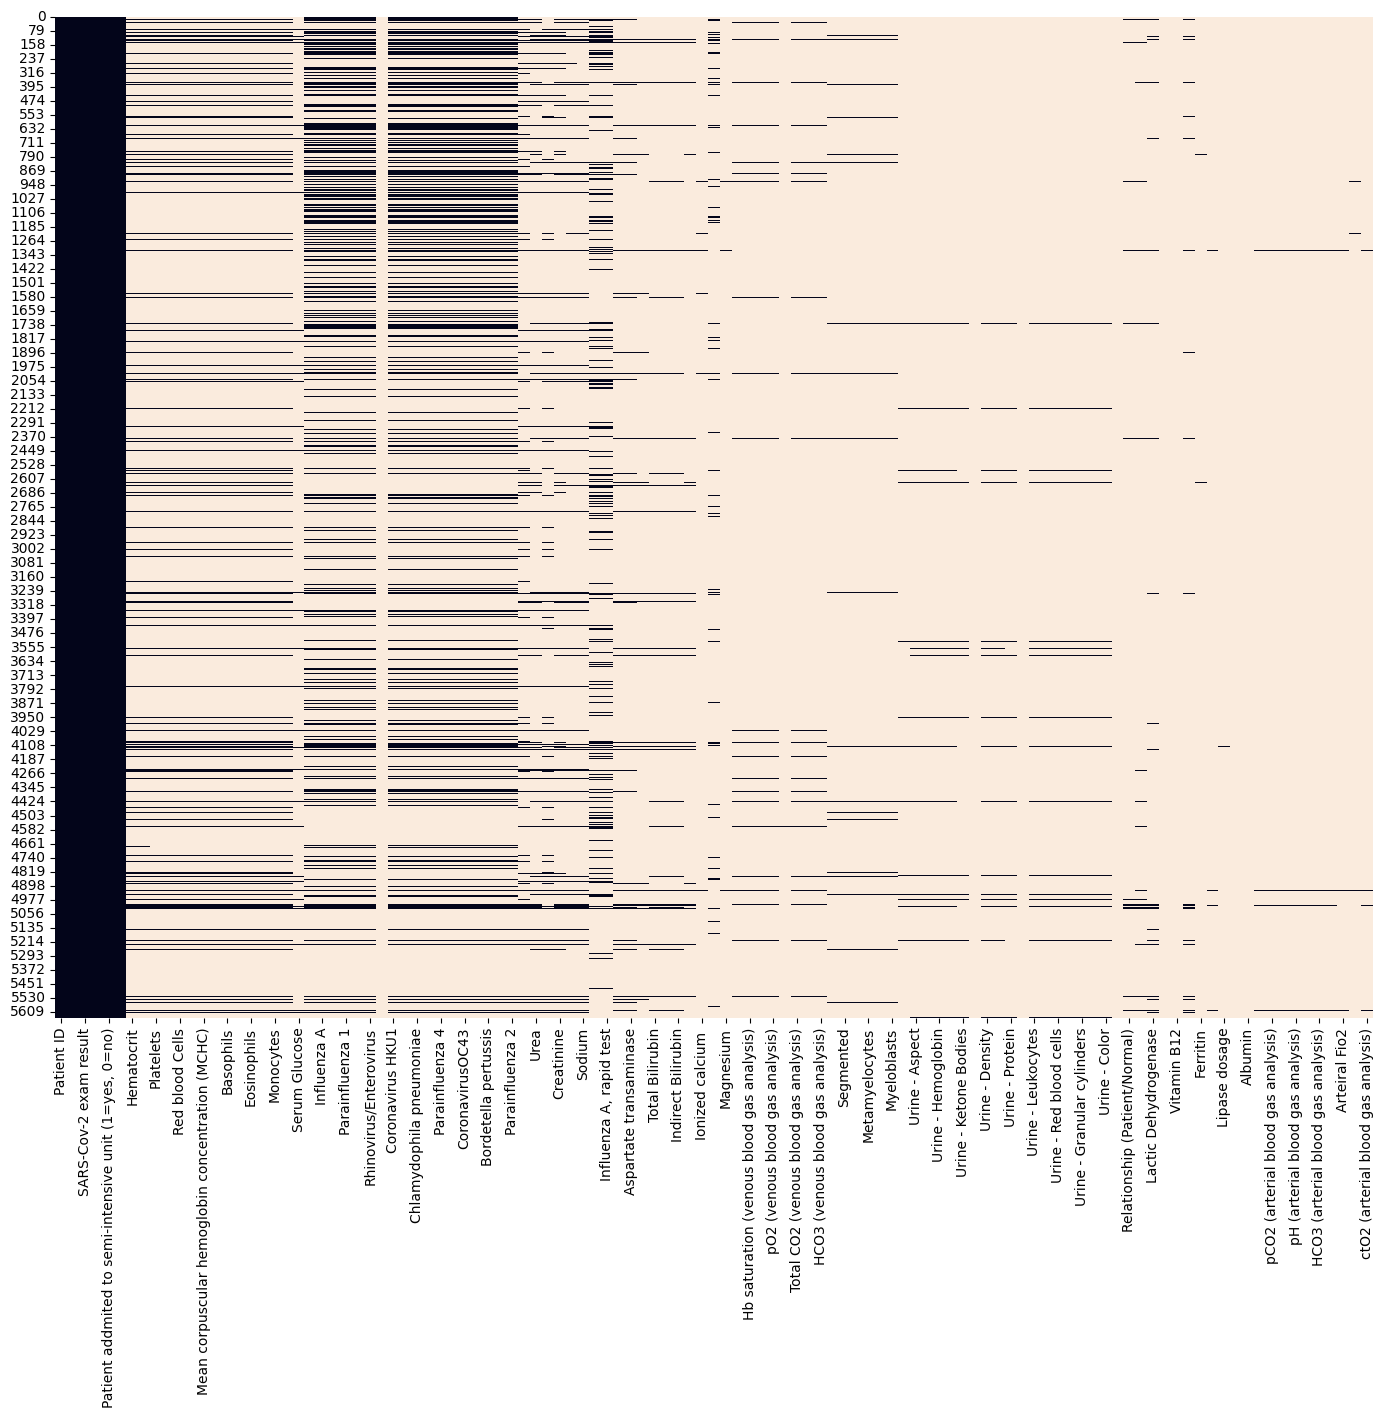

In [13]:
plt.figure(figsize=(17,13))
sns.heatmap(df.isna(),cbar=False)

**observations**: from the graph above we can say that some columns are correlated because thet have the same numbers of  missing values

In [14]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

Urine - Sugar                                            1.000000
Mycoplasma pneumoniae                                    1.000000
Partial thromboplastin time (PTT)                        1.000000
Prothrombin time (PT), Activity                          1.000000
D-Dimer                                                  1.000000
Fio2 (venous blood gas analysis)                         0.999823
Urine - Nitrite                                          0.999823
Vitamin B12                                              0.999468
Lipase dosage                                            0.998583
Albumin                                                  0.997697
Phosphor                                                 0.996456
Arteiral Fio2                                            0.996456
Ferritin                                                 0.995925
Arterial Lactic Acid                                     0.995216
ctO2 (arterial blood gas analysis)                       0.995216
Hb saturat

**observation**: 
- a lot of Nan (half of columns > 90% Nan)
-  2 groupes one of 76% : viral Test, 89% blood test

## deep analysis

### removing irrelevant columns

In [15]:
### removing columns with missing values >90%
df=df[df.columns[(df.isna().sum()/df.shape[0]) <0.9]]

<AxesSubplot: >

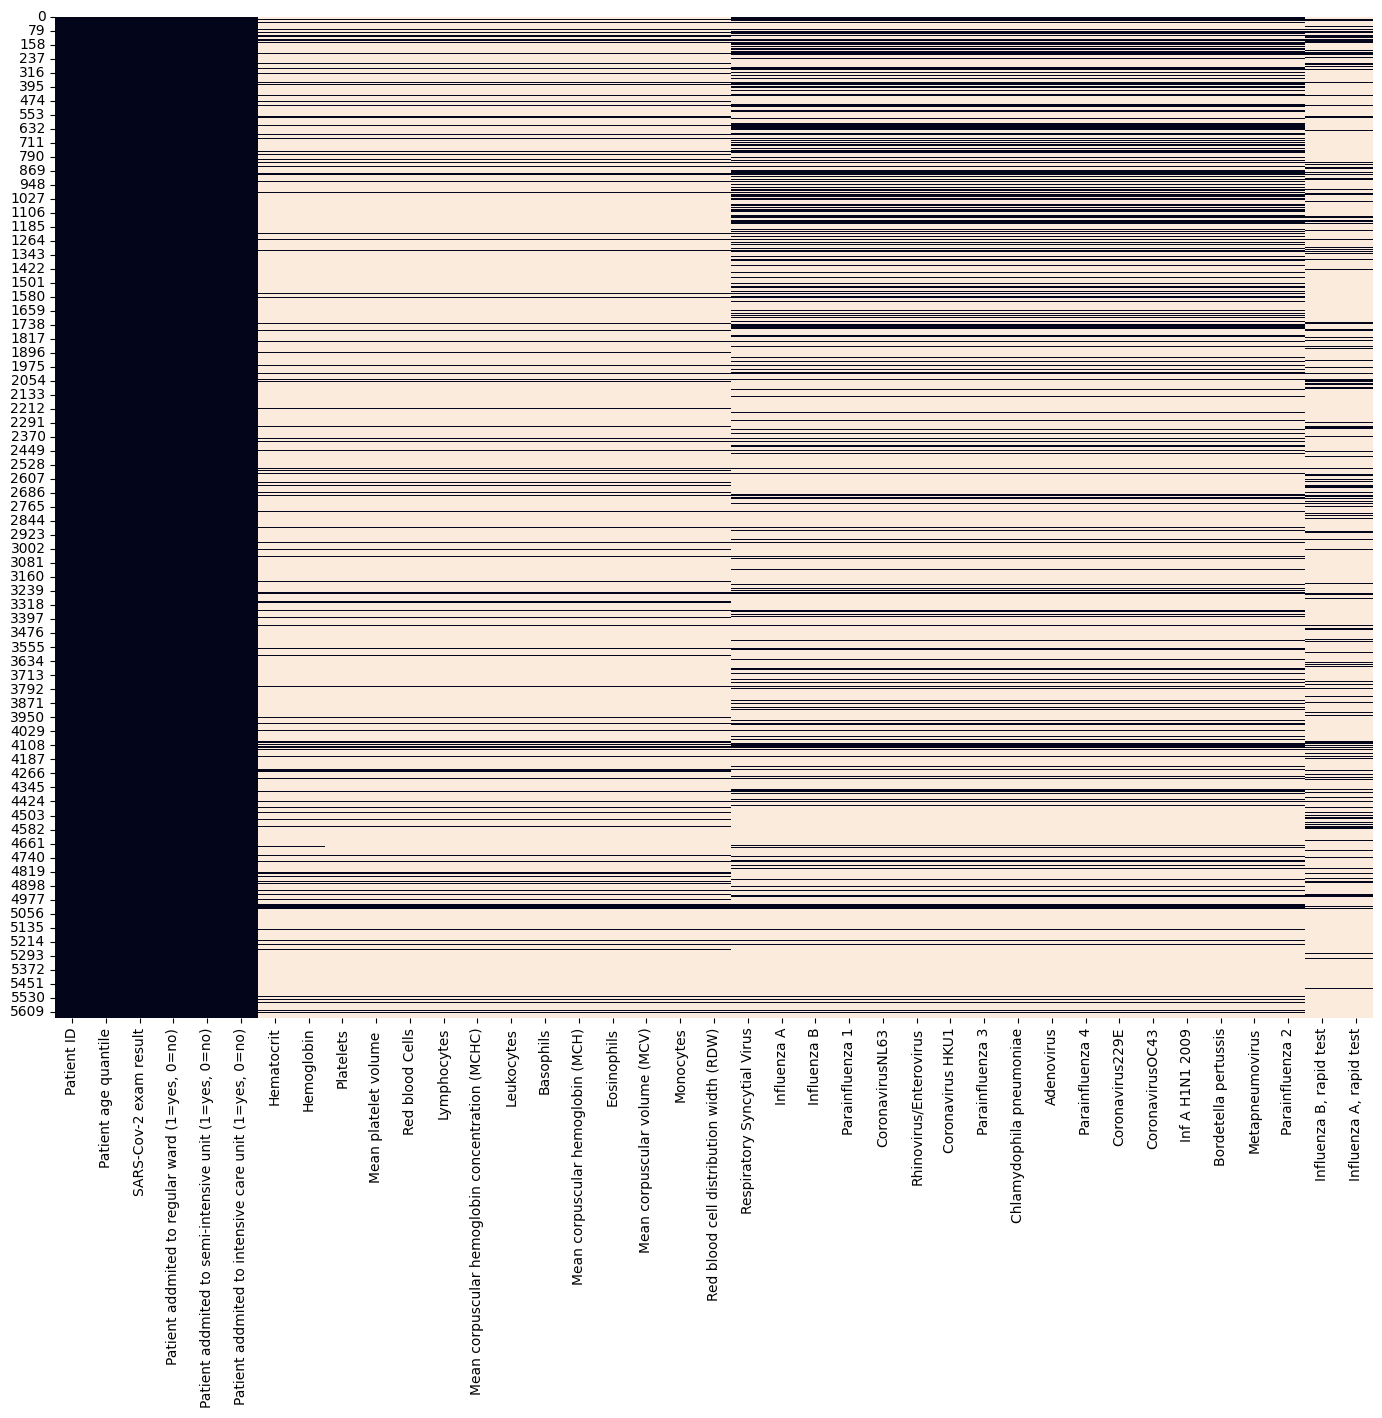

In [16]:
plt.figure(figsize=(17,13))
sns.heatmap(df.isna(),cbar=False)

In [17]:
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN             

In [18]:
### dropping Patient ID
df.drop("Patient ID",axis=1,inplace=True)

In [19]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

### Target Variable


In [20]:
df["SARS-Cov-2 exam result"].value_counts(normalize=True)

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

**observation**: we have an imbalanced dataset
* negatif 90%
* positif 10%

### exploring independent Variables

#### plotting histogram of conitues variables

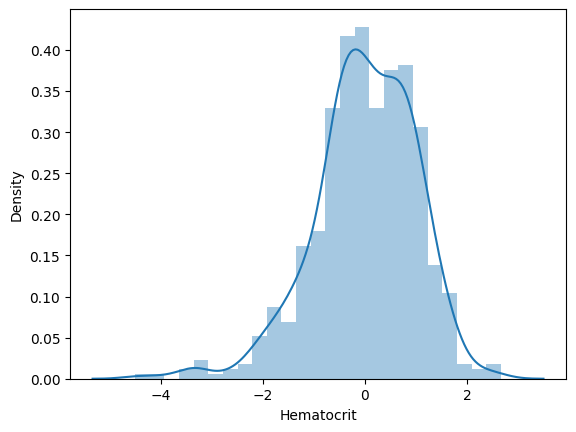

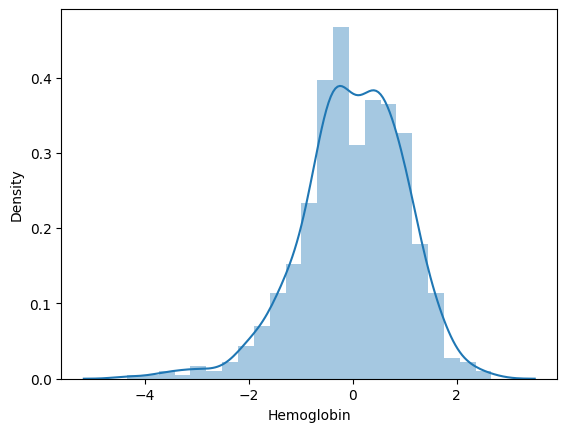

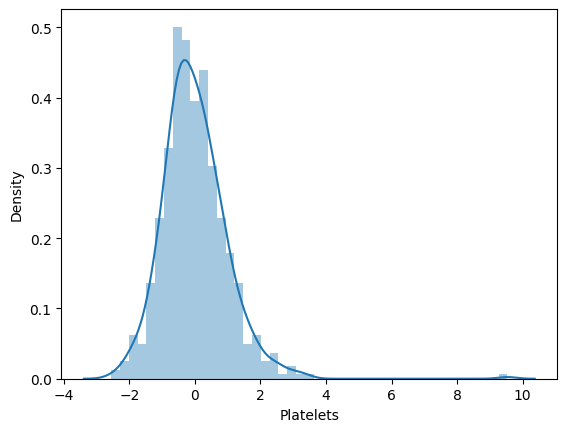

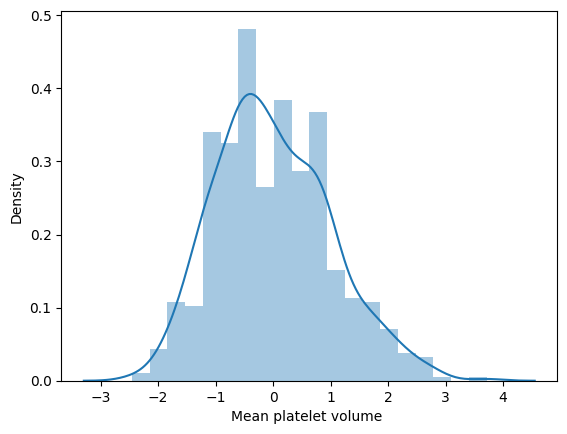

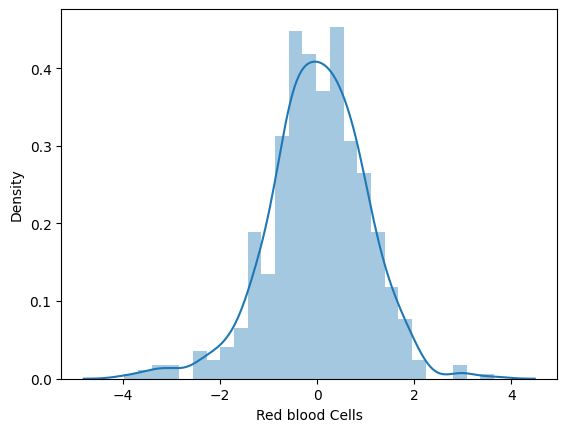

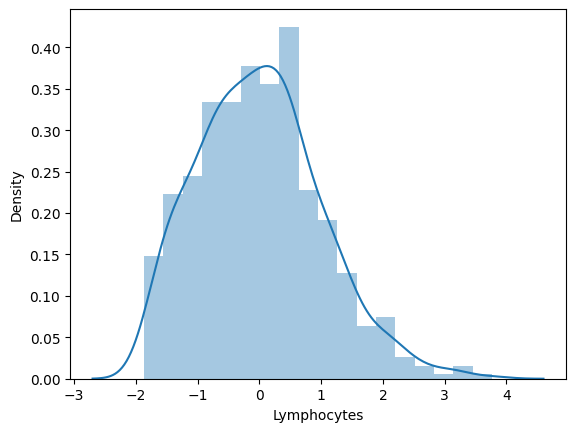

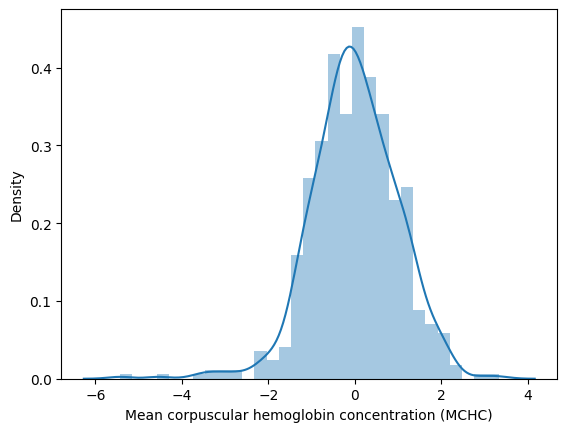

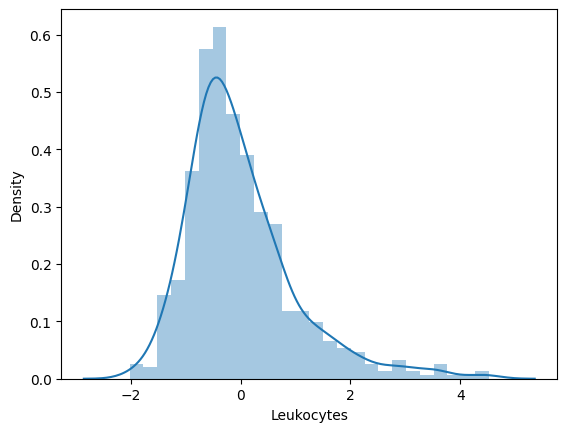

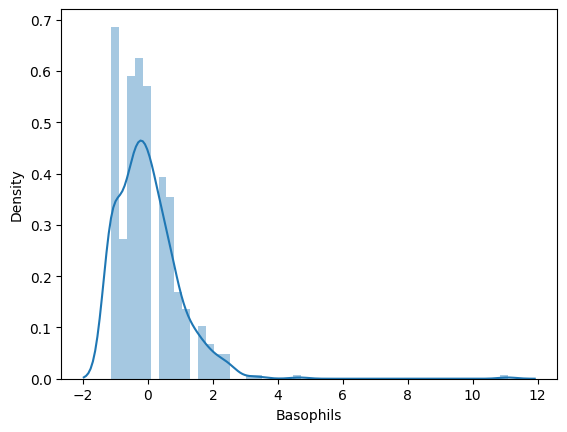

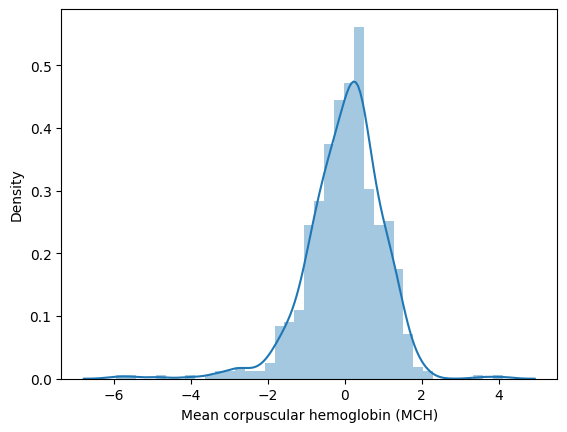

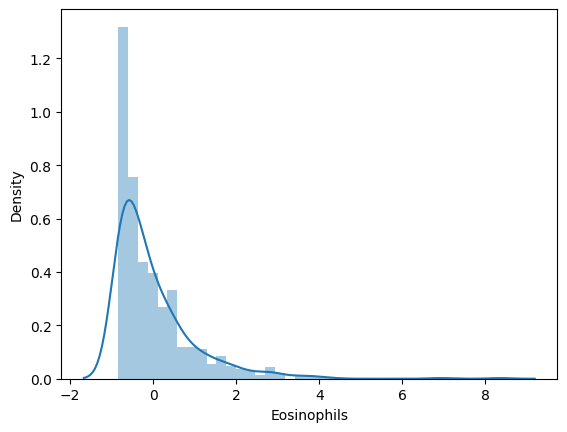

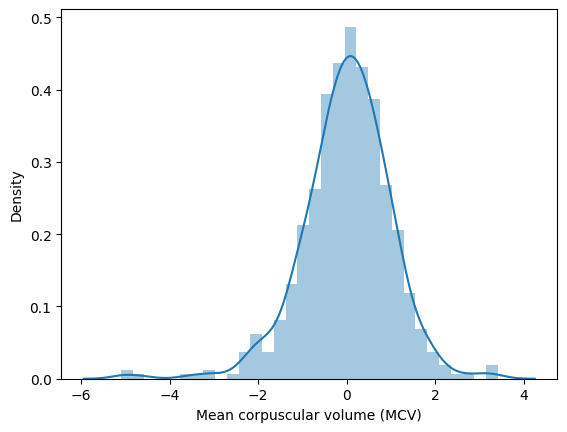

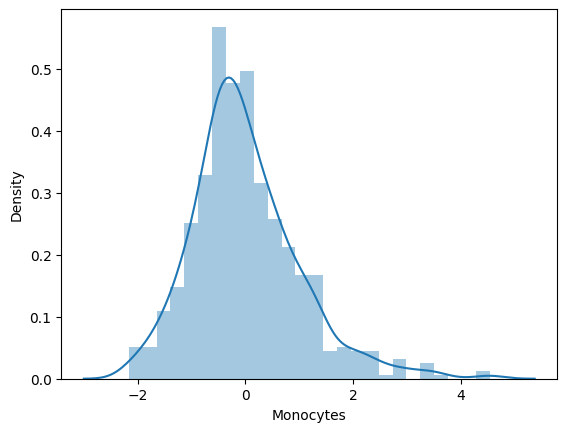

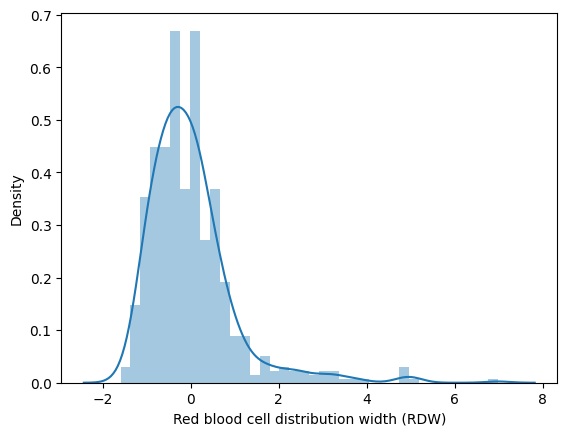

In [21]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])


<AxesSubplot: xlabel='Patient age quantile', ylabel='Density'>

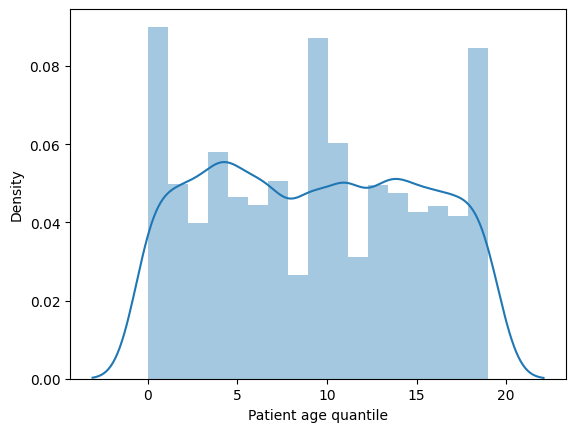

In [22]:
sns.distplot(df["Patient age quantile"])

#### categorical values

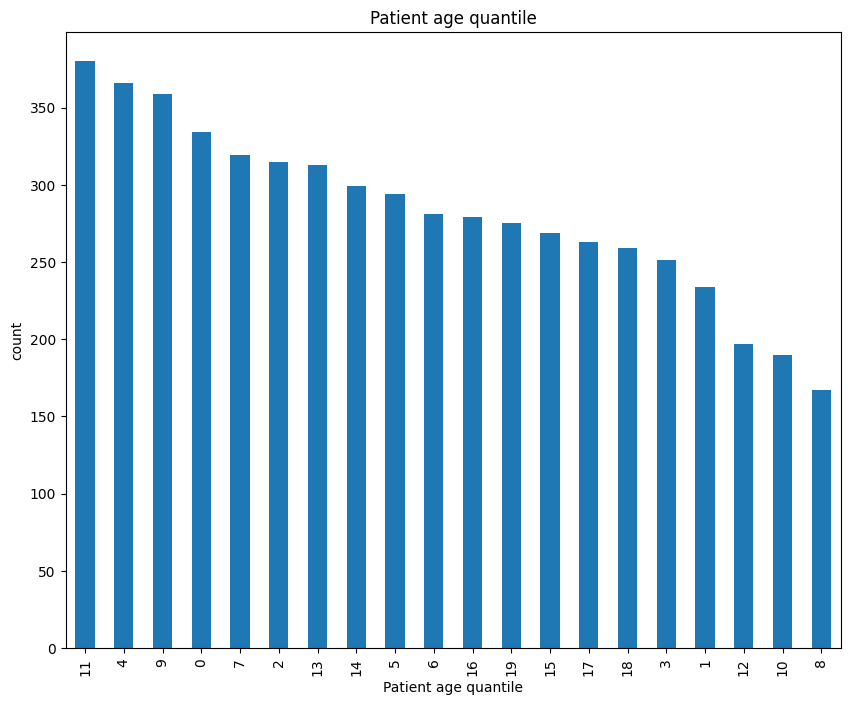

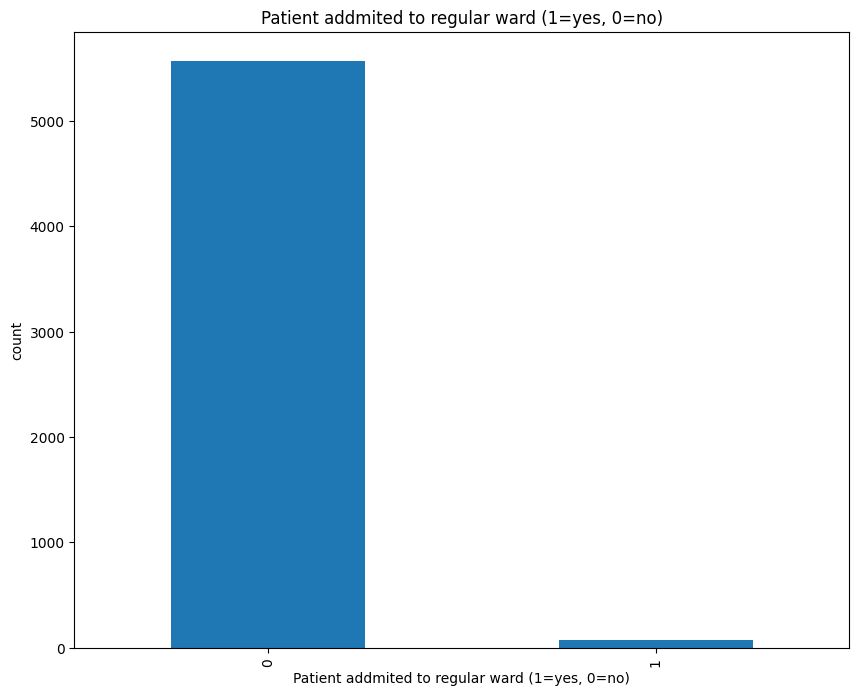

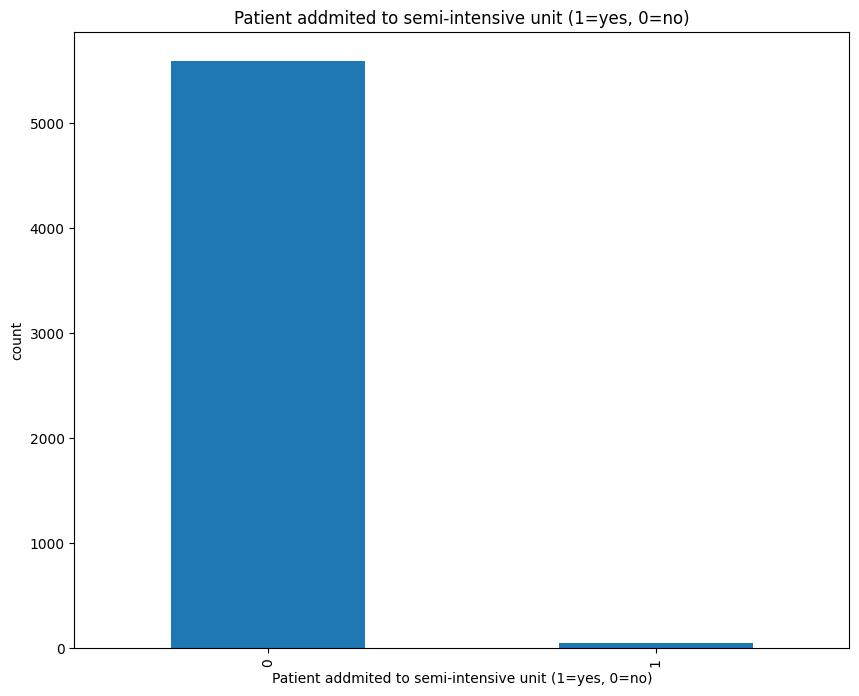

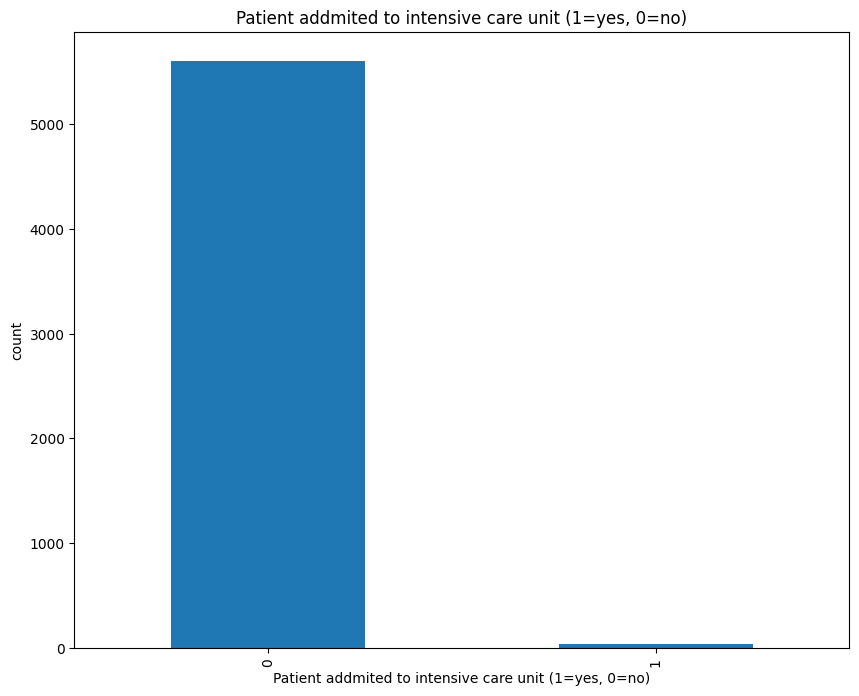

In [23]:
for col in df.select_dtypes("int"):
    plt.figure()
    plt.title(f"{col}")
    plt.xlabel(f"{col}")
    plt.ylabel("count")
    df[col].value_counts().plot(kind='bar',figsize=(10,8))

In [24]:
categorical_values=df.select_dtypes("object").columns


In [25]:
cat_values=['Respiratory Syncytial Virus', 'Influenza A',
       'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63',
       'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3',
       'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4',
       'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009',
       'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2',
       'Influenza B, rapid test', 'Influenza A, rapid test']

In [26]:
for col in cat_values:

    df_=pd.DataFrame(zip(df[col].value_counts().index,list(df[col].value_counts())),columns=["index","values"])
    fig = px.pie(df_, names="index", values='values', title=f'{col}')
    fig.show()

**observation**: we notice from above :
* that `detected` category in each test is a rare minority compared to `non detected` class .
* the most of features are less than 10% ,except Rihnovirus (28% 'detected' and 72% 'non detected')

### Relation features -target

#### creation class Positif/negatif

In [27]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

In [28]:
df_negative=df[df["SARS-Cov-2 exam result"]=="negative"]
df_positive=df[df["SARS-Cov-2 exam result"]=="positive"]

#### creation class viral/blood

In [29]:
(df.isna().sum()/df.shape[0])

Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Hematocrit                                               0.893161
Hemoglobin                                               0.893161
Platelets                                                0.893338
Mean platelet volume                                     0.893870
Red blood Cells                                          0.893338
Lymphocytes                                              0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Leukocytes                                               0.893338
Basophils                                                0.893338
Mean corpuscular hemoglobin (MCH)                        0.893338
Eosinophil

In [30]:
blood_columns=df.columns[((df.isna().sum()/df.shape[0])<0.9) &((df.isna().sum()/df.shape[0])>0.88)]
viral_columns=df.columns[((df.isna().sum()/df.shape[0])<0.88) &((df.isna().sum()/df.shape[0])>0.75)]

#### Blood/target

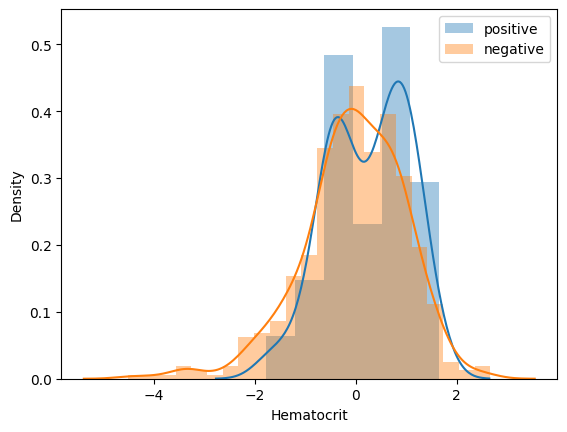

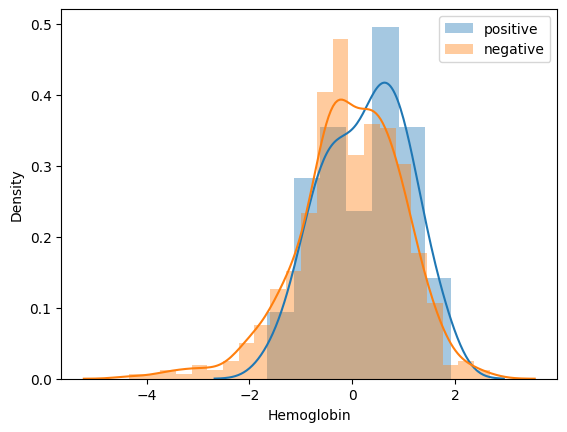

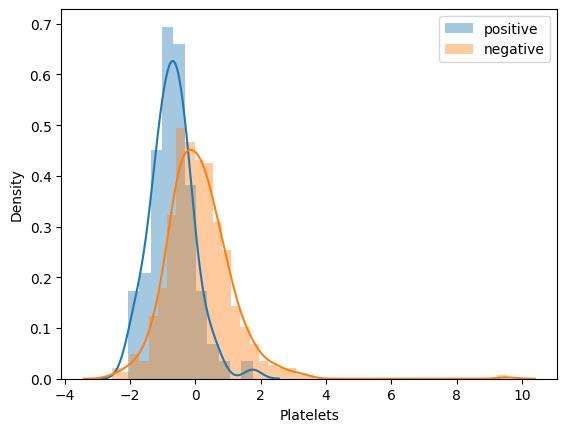

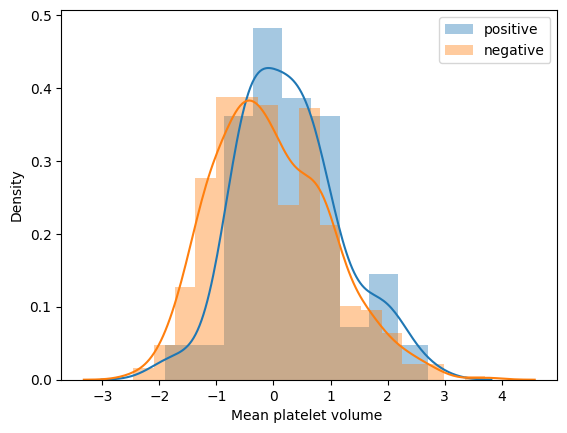

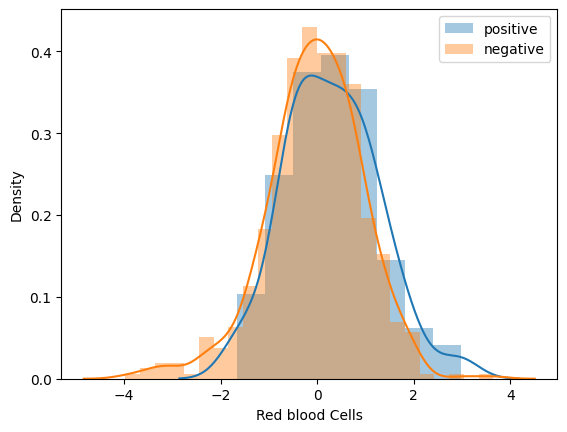

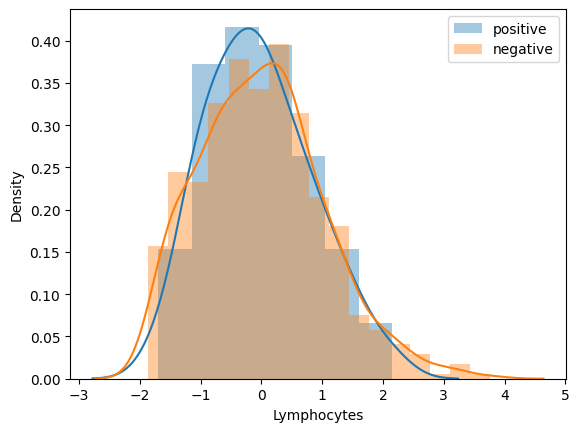

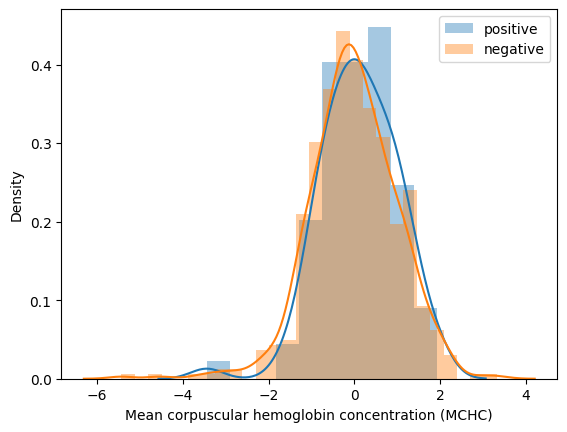

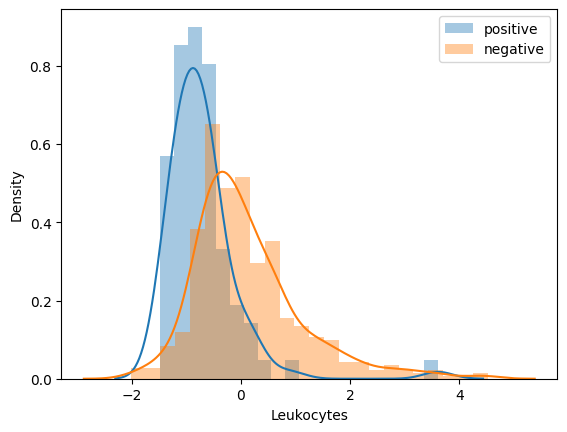

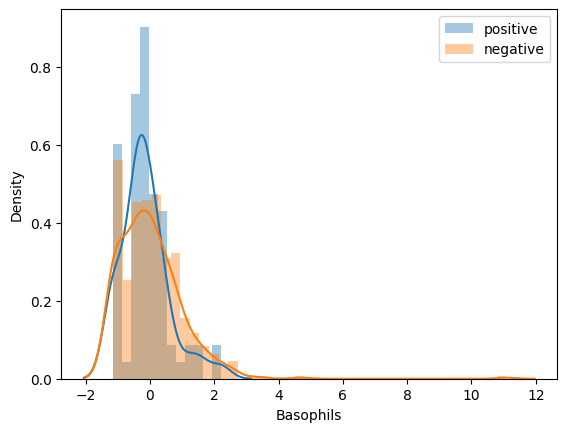

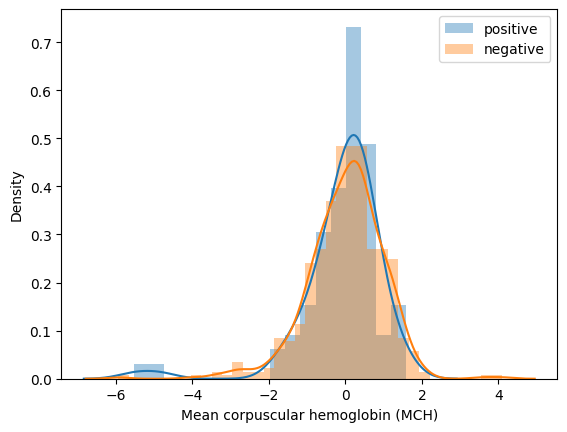

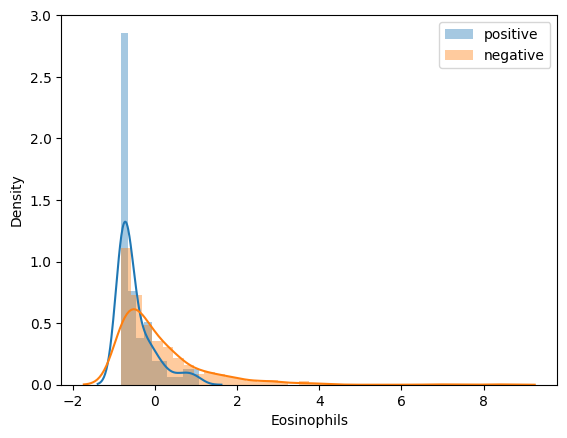

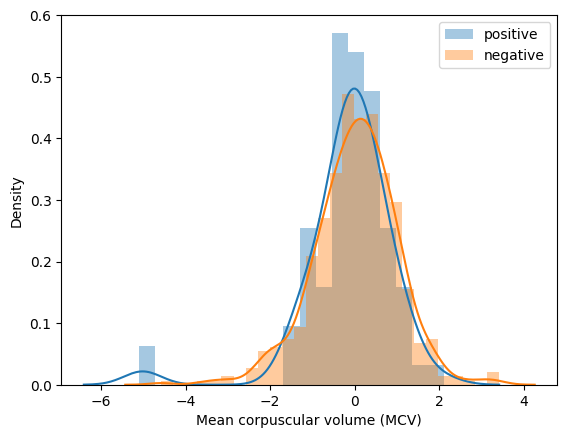

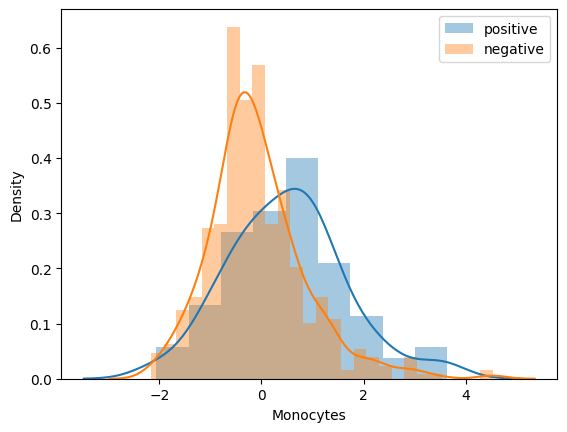

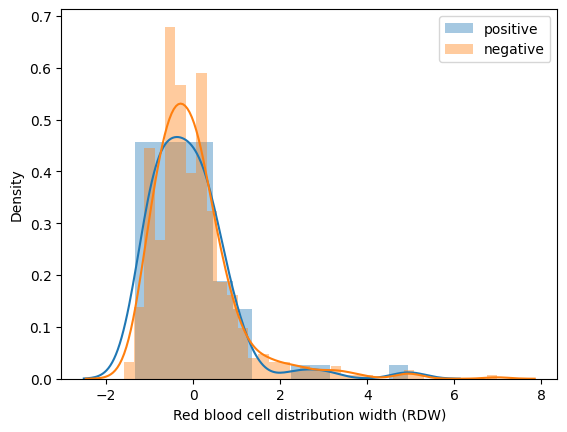

In [31]:
for col in blood_columns:
    plt.figure()
    sns.distplot(df_positive[col],label="positive")
    sns.distplot(df_negative[col],label="negative")
    plt.legend()

**observation**:
* `hypotheses`: for the [Monocytes,Keukocytes,Platelets] seems related  Covid-19

### ViRal/target

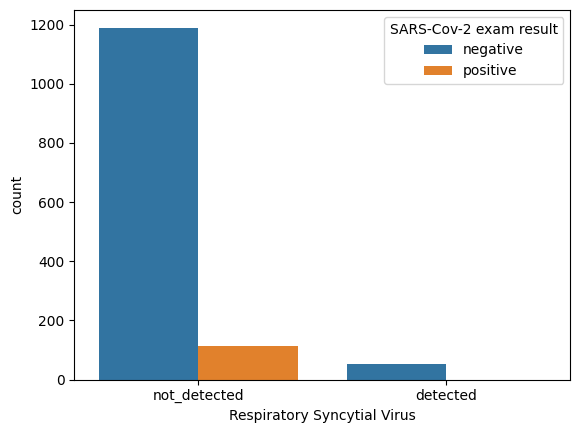

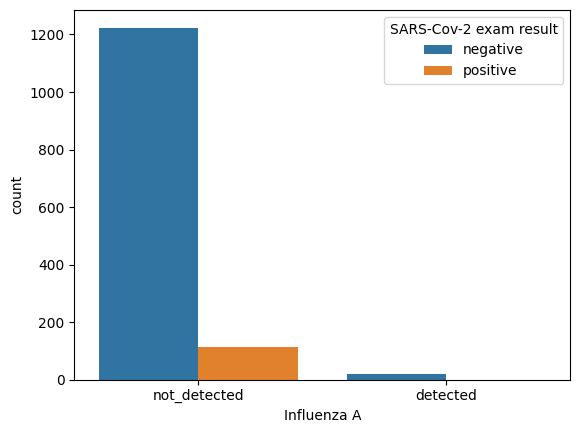

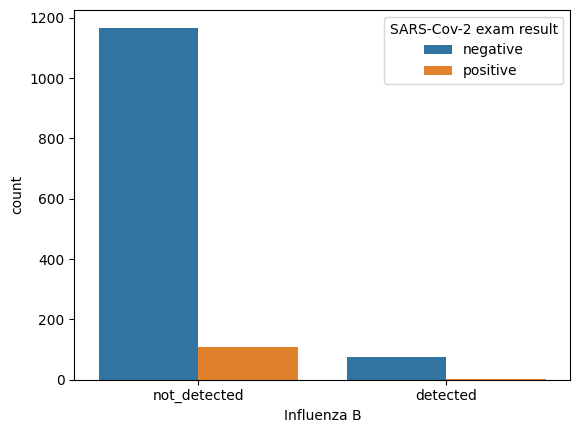

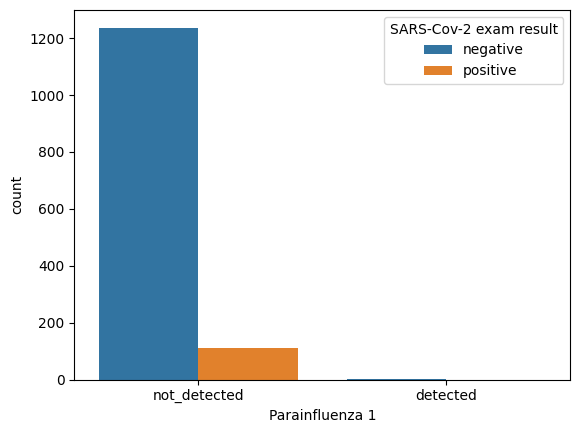

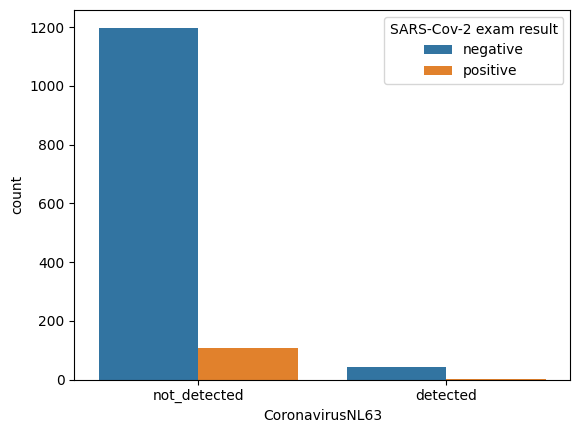

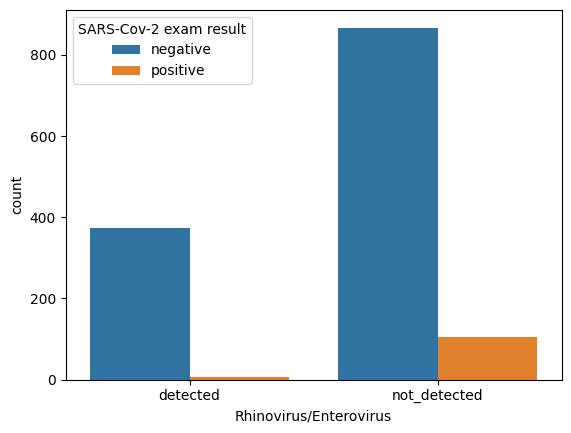

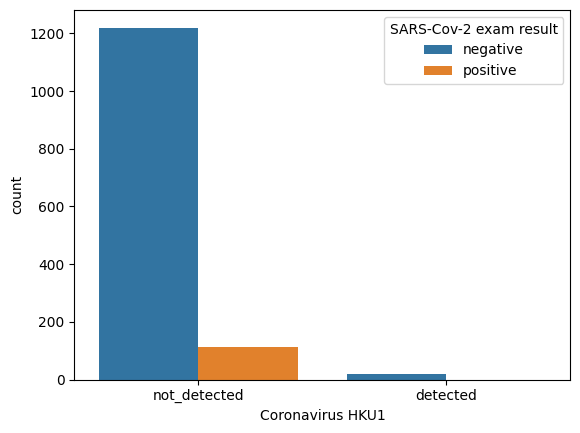

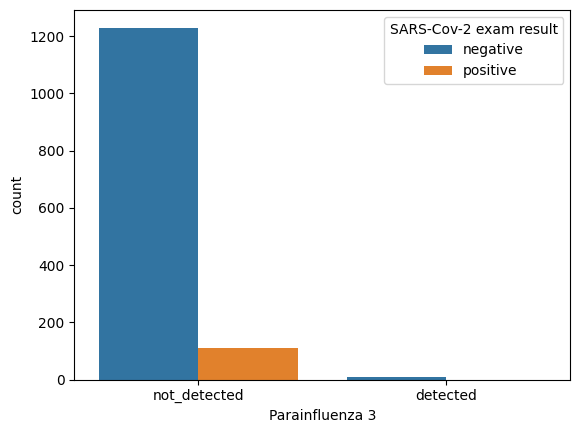

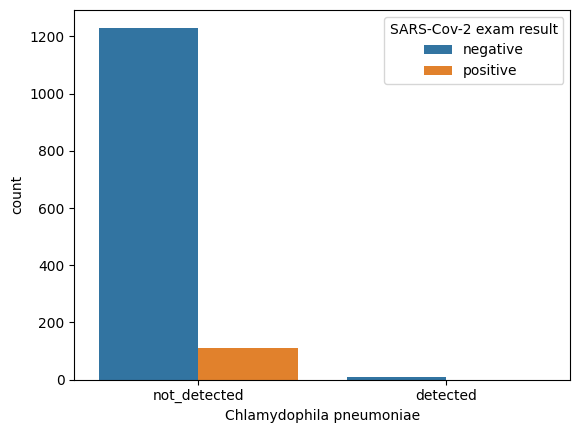

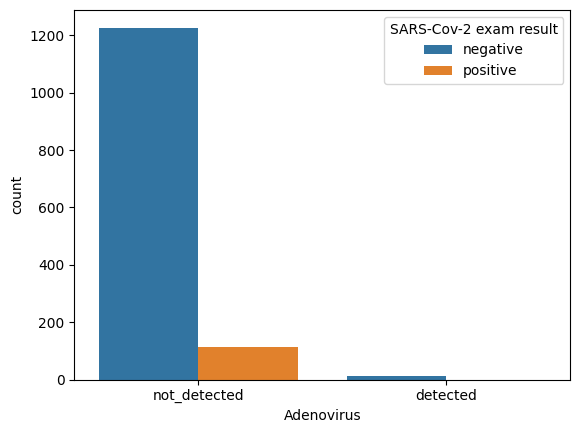

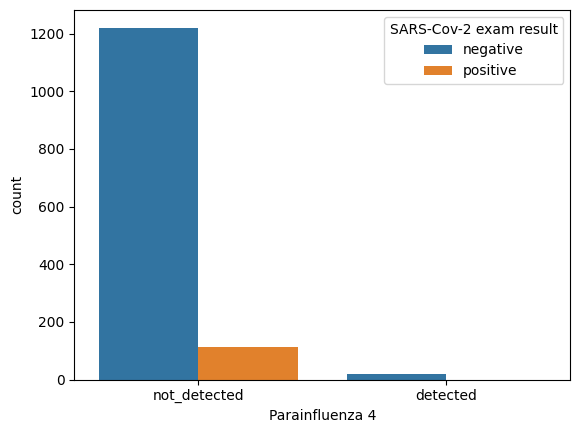

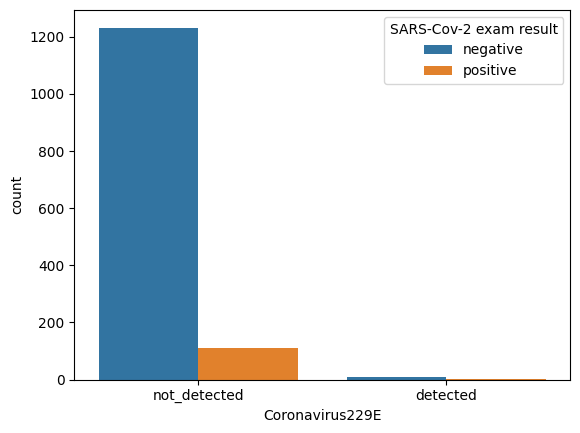

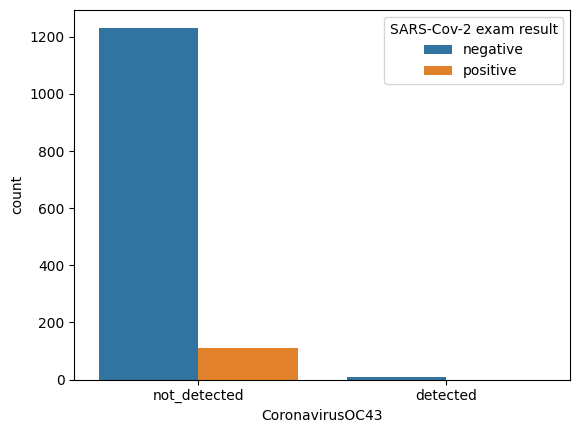

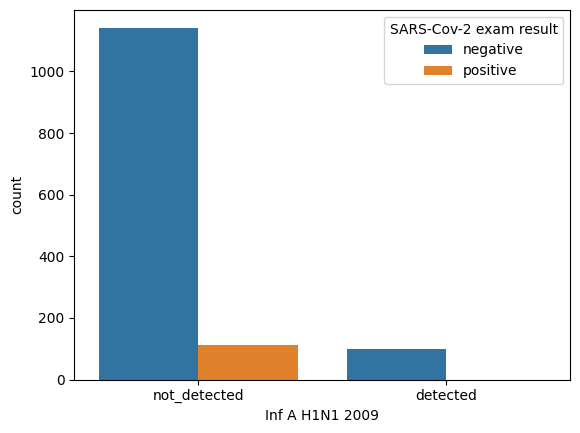

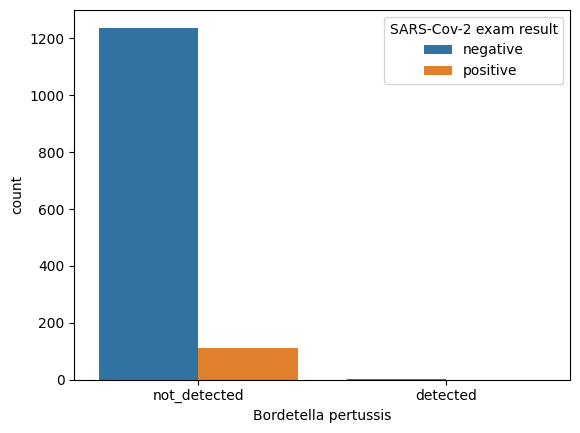

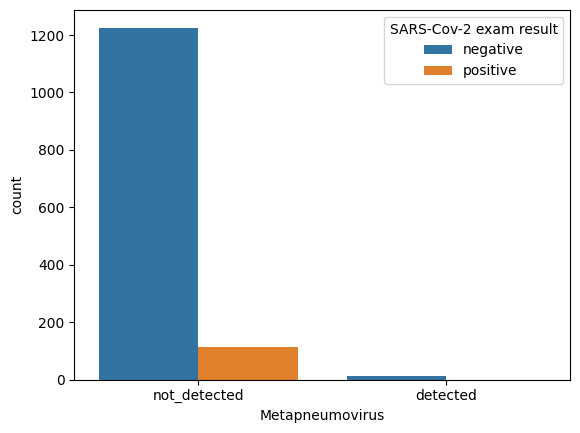

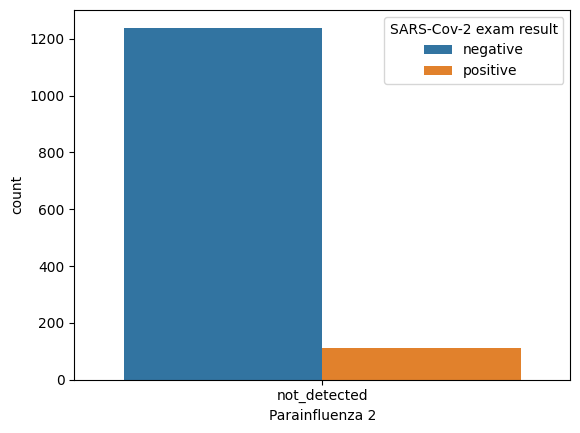

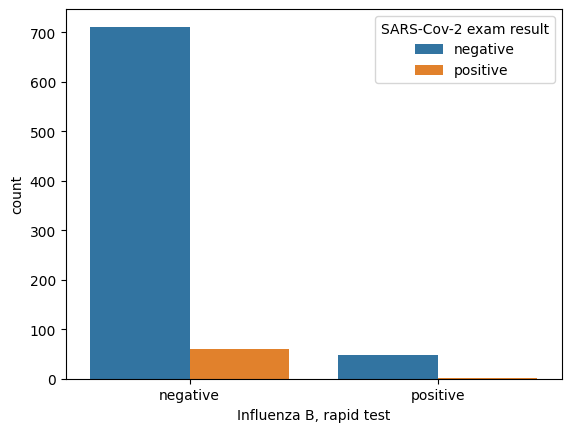

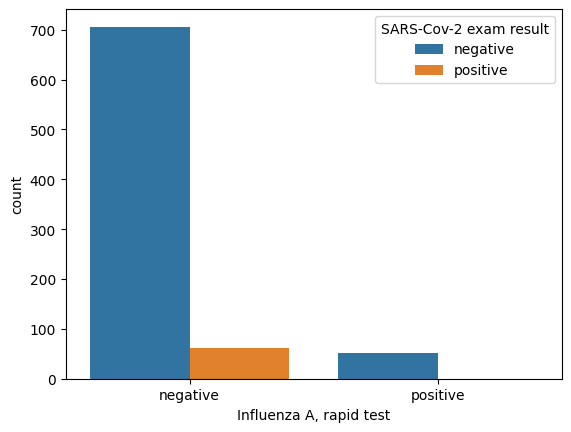

In [32]:
for col in viral_columns:
    plt.figure()
    sns.countplot(x=col,data=df,hue="SARS-Cov-2 exam result")

**observation** :double diseases are rare

### Relation variables variables

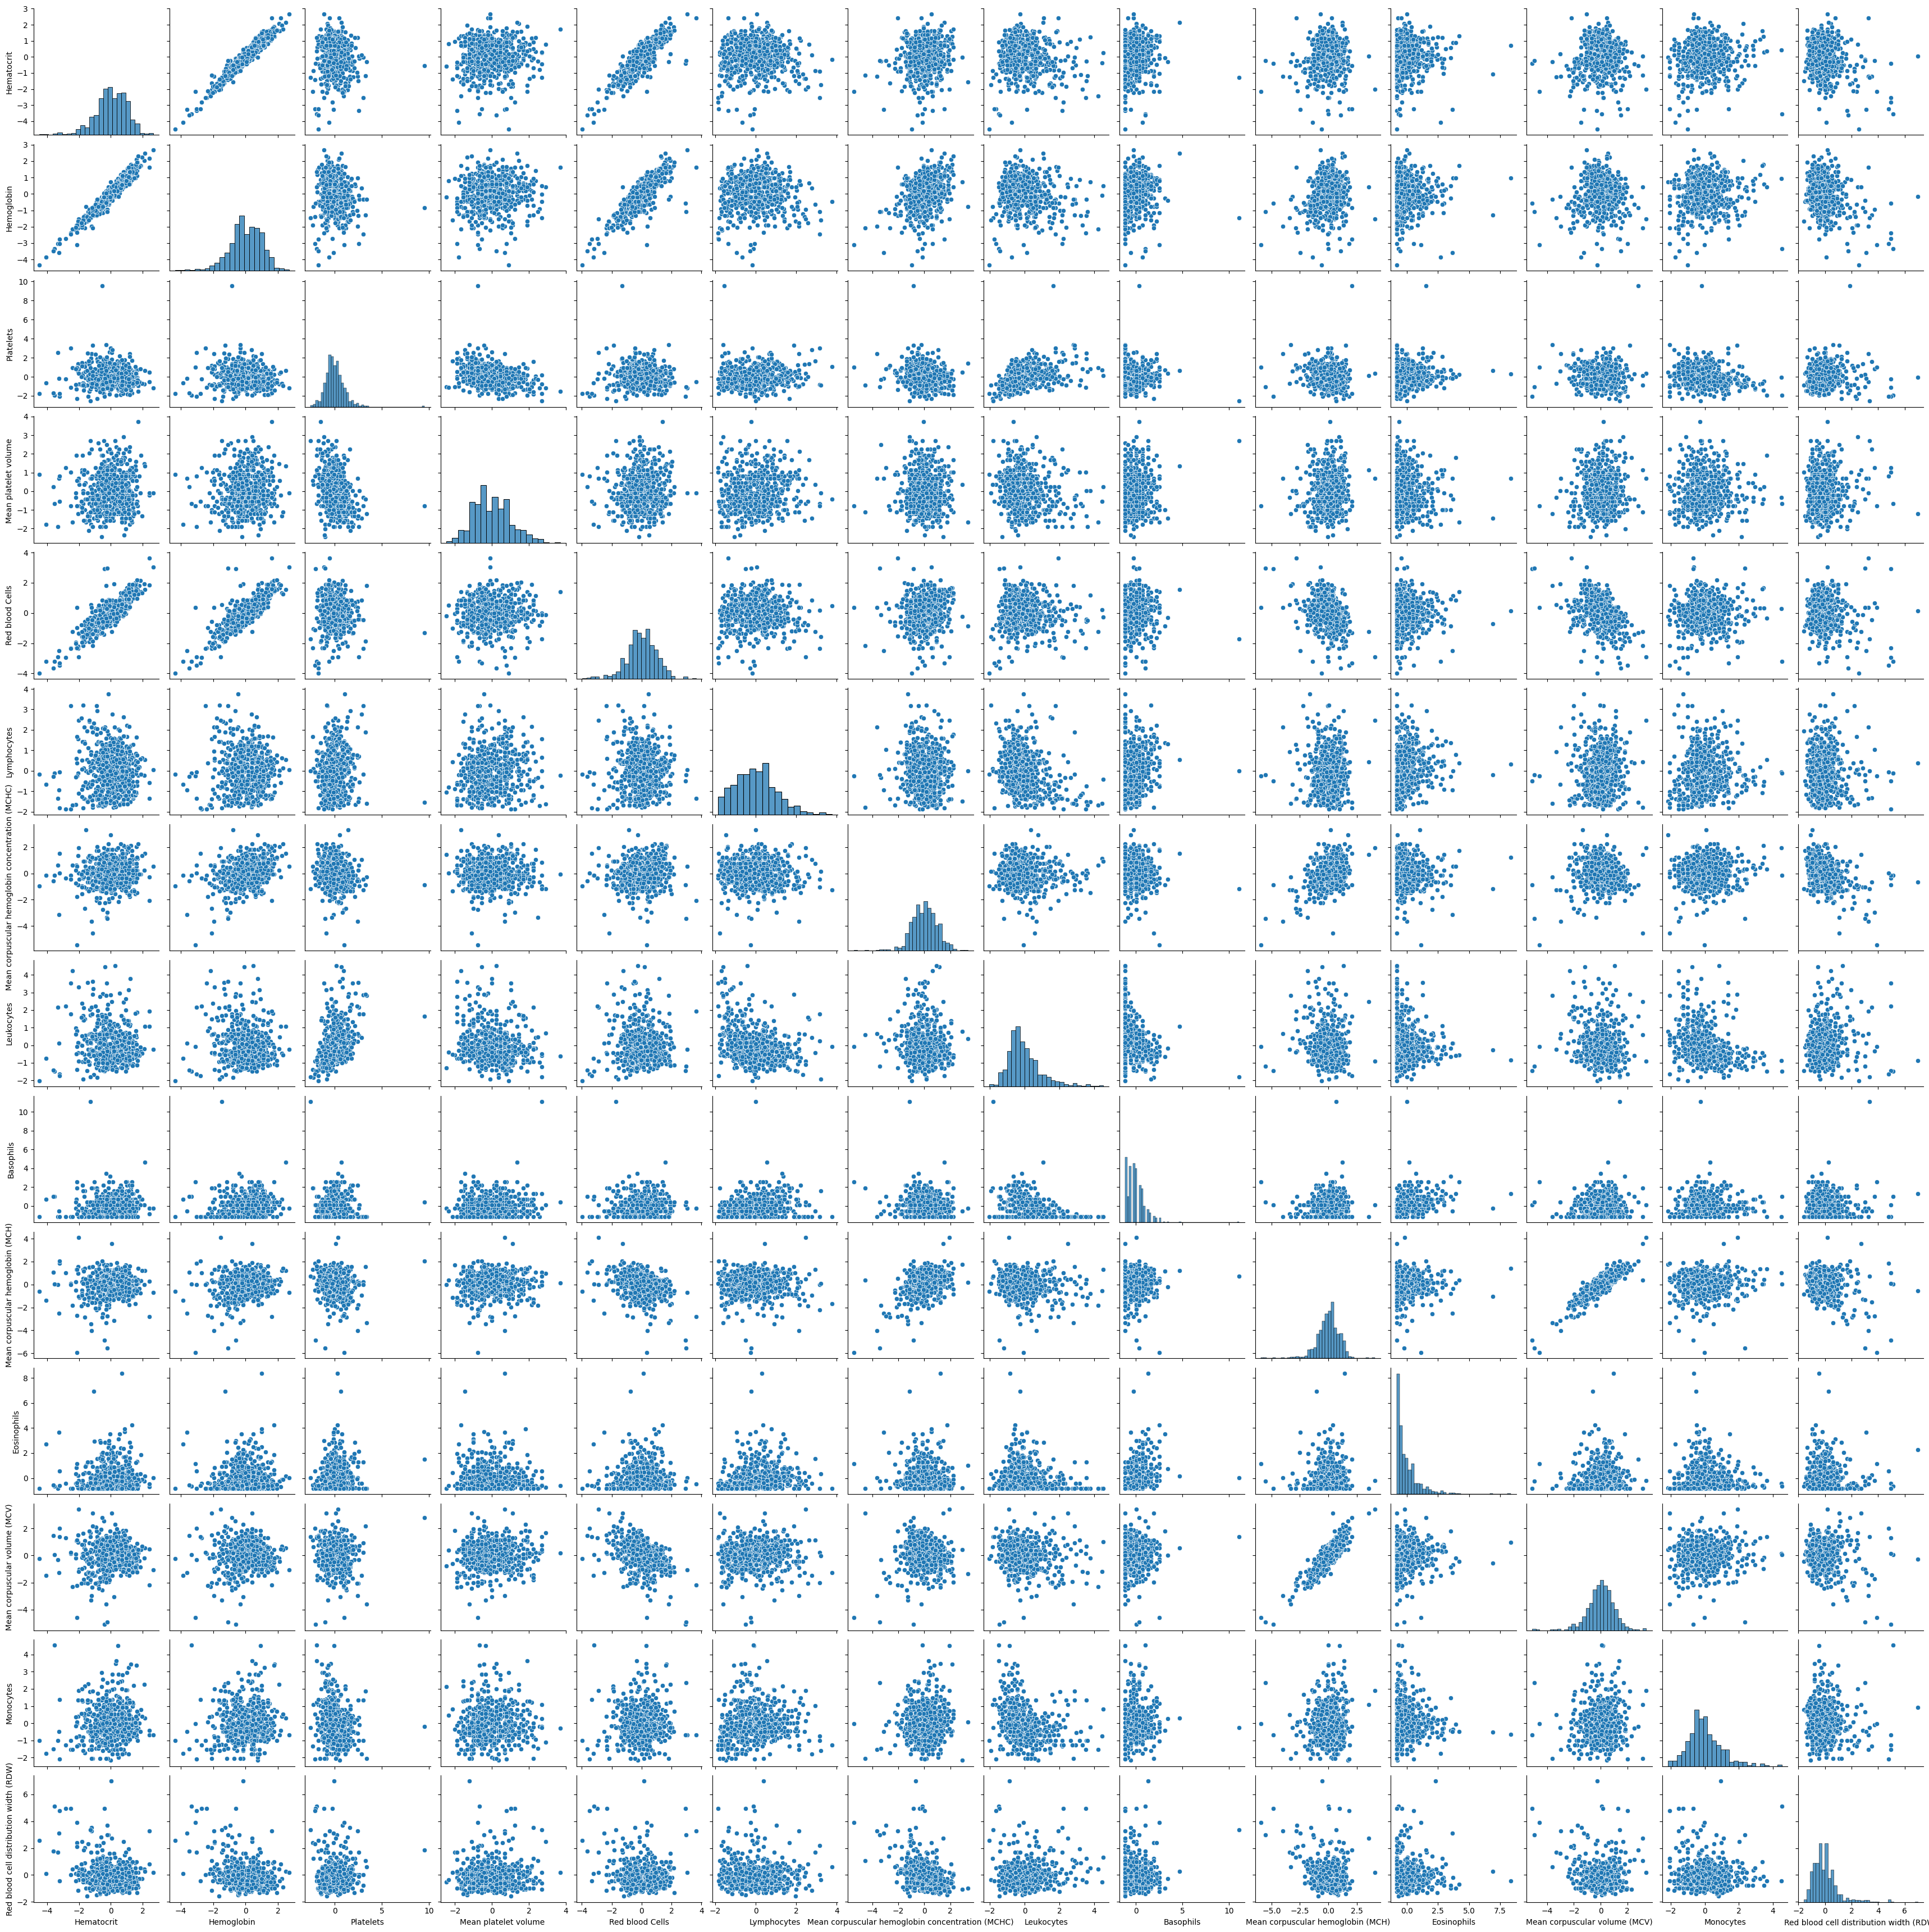

In [33]:
### blood/blood
sns.pairplot(df[blood_columns])

<AxesSubplot: >

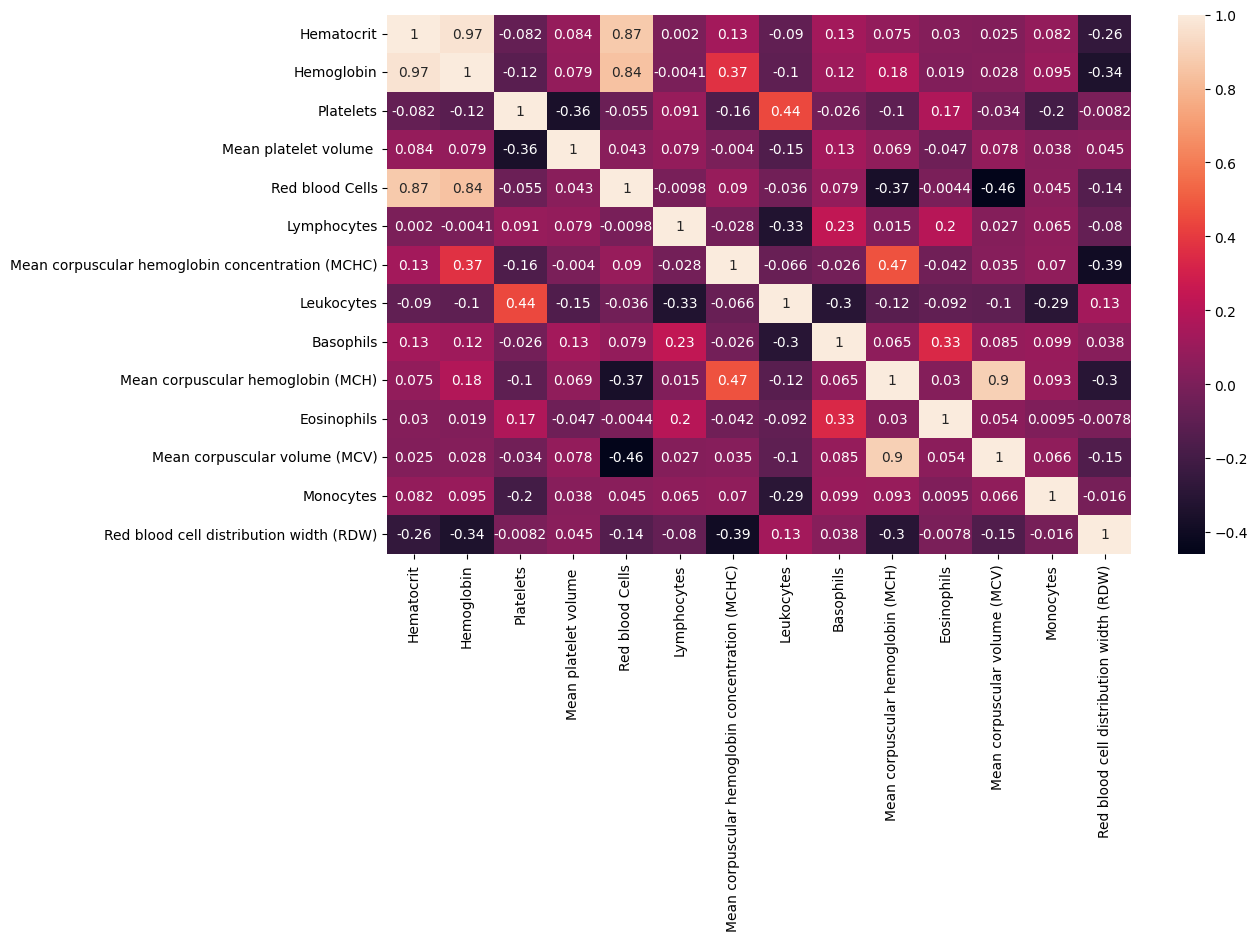

In [34]:
### correlation
plt.figure(figsize=(12,7))
sns.heatmap(df[blood_columns].corr(),annot=True)

In [35]:
### filtering columns that are more correlated
df[blood_columns].corr()[df[blood_columns].corr()>=0.8]

Hematocrit  Hemoglobin  \
Hematocrit                                          1.000000    0.968447   
Hemoglobin                                          0.968447    1.000000   
Platelets                                                NaN         NaN   
Mean platelet volume                                     NaN         NaN   
Red blood Cells                                     0.872987    0.841420   
Lymphocytes                                              NaN         NaN   
Mean corpuscular hemoglobin concentration (MCHC)         NaN         NaN   
Leukocytes                                               NaN         NaN   
Basophils                                                NaN         NaN   
Mean corpuscular hemoglobin (MCH)                        NaN         NaN   
Eosinophils                                              NaN         NaN   
Mean corpuscular volume (MCV)                            NaN         NaN   
Monocytes                                                NaN         NaN   
Red blood cell distribution width (RDW)                  NaN         NaN   

                                                  Platelets  \
Hematocrit                                              NaN   
Hemoglobin                                              NaN   
Platelets                                               1.0   
Mean platelet volume                                    NaN   
Red blood Cells                                         NaN   
Lymphocytes                                             NaN   
Mean corpuscular hemoglobin concentration (MCHC)        NaN   
Leukocytes                                              NaN   
Basophils                                               NaN   
Mean corpuscular hemoglobin (MCH)                       NaN   
Eosinophils                                             NaN   
Mean corpuscular volume (MCV)                           NaN   
Monocytes                                               NaN   
Red blood cell distribution width (RDW)                 NaN   

                                                  Mean platelet volume   \
Hematocrit                                                          NaN   
Hemoglobin                                                          NaN   
Platelets                                                           NaN   
Mean platelet volume                                                1.0   
Red blood Cells                                                     NaN   
Lymphocytes                                                         NaN   
Mean corpuscular hemoglobin concentration (MCHC)                    NaN   
Leukocytes                                                          NaN   
Basophils                                                           NaN   
Mean corpuscular hemoglobin (MCH)                                   NaN   
Eosinophils                                                         NaN   
Mean corpuscular volume (MCV)                                       NaN   
Monocytes                                                           NaN   
Red blood cell distribution width (RDW)                             NaN   

                                                  Red blood Cells  \
Hematocrit                                               0.872987   
Hemoglobin                                               0.841420   
Platelets                                                     NaN   
Mean platelet volume                                          NaN   
Red blood Cells                                          1.000000   
Lymphocytes                                                   NaN   
Mean corpuscular hemoglobin concentration (MCHC)              NaN   
Leukocytes                                                    NaN   
Basophils                                                     NaN   
Mean corpuscular hemoglobin (MCH)                             NaN   
Eosinophils                                                   NaN   
Mean corp

**observation**: some variables are highly correlated like :
* `Hemoglobin` and `Hematocrit` 
* `Red blood Cells` and `Hematocrit`
* `Red blood Cells` and `Hemoglobin`
`


#### Relation blood/Age

In [36]:
df.columns

Index(['Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells',
       'Lymphocytes', 'Mean corpuscular hemoglobin concentration (MCHC)',
       'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)',
       'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)',
       'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rap

<Figure size 640x480 with 0 Axes>

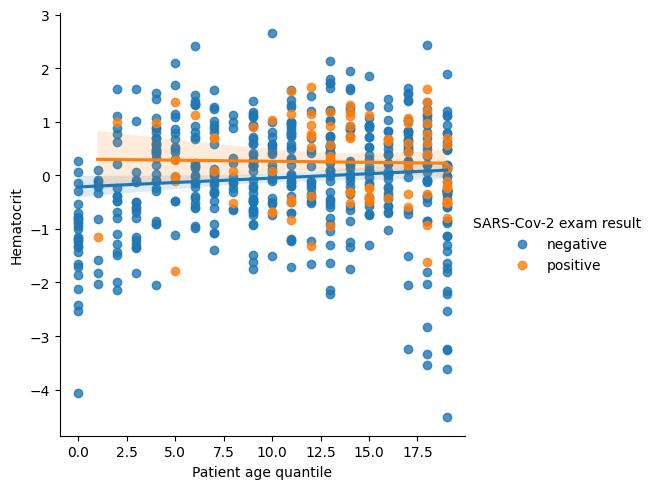

<Figure size 640x480 with 0 Axes>

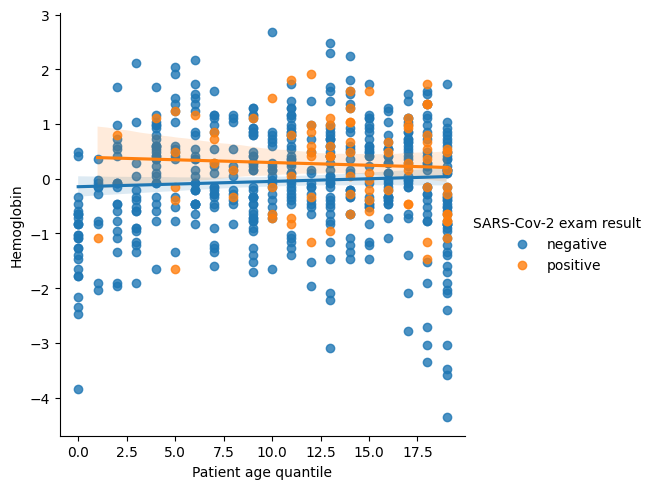

<Figure size 640x480 with 0 Axes>

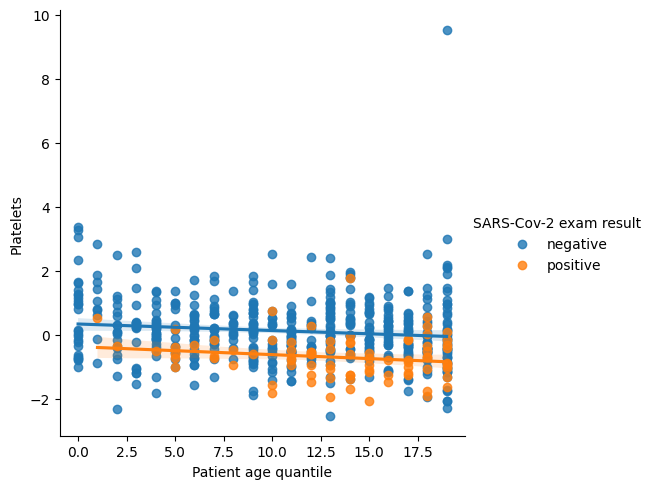

<Figure size 640x480 with 0 Axes>

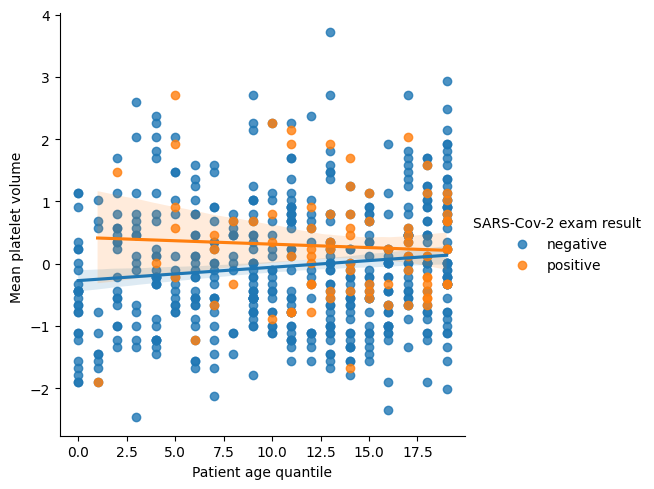

<Figure size 640x480 with 0 Axes>

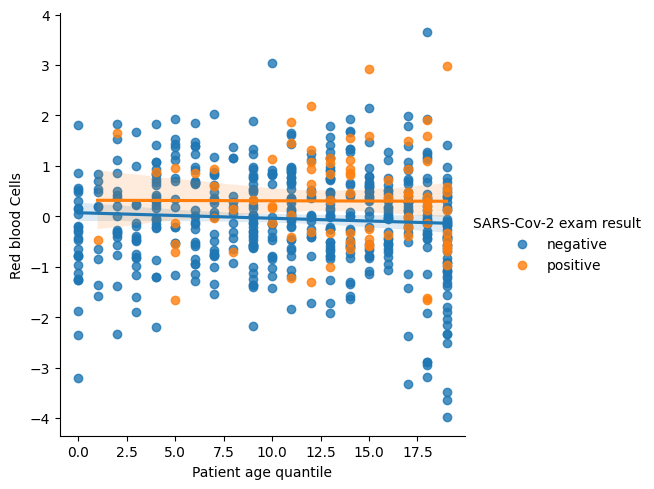

<Figure size 640x480 with 0 Axes>

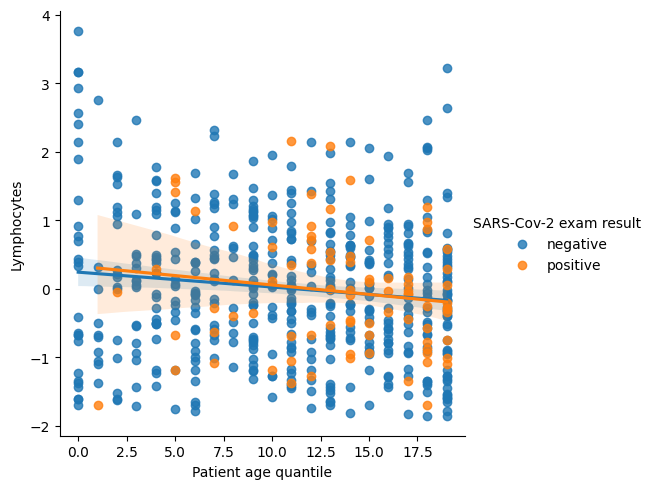

<Figure size 640x480 with 0 Axes>

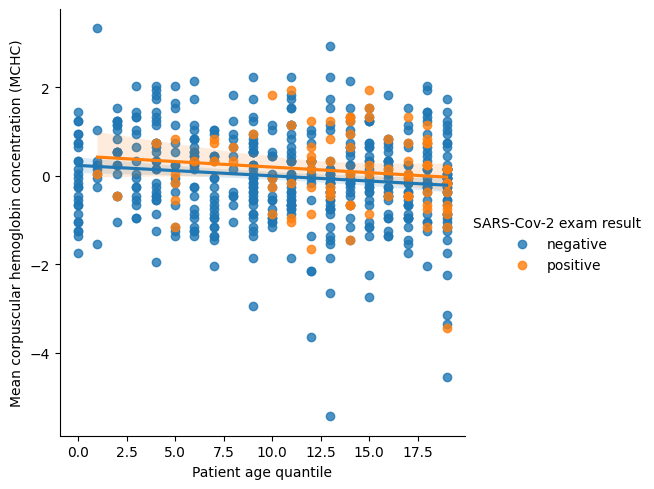

<Figure size 640x480 with 0 Axes>

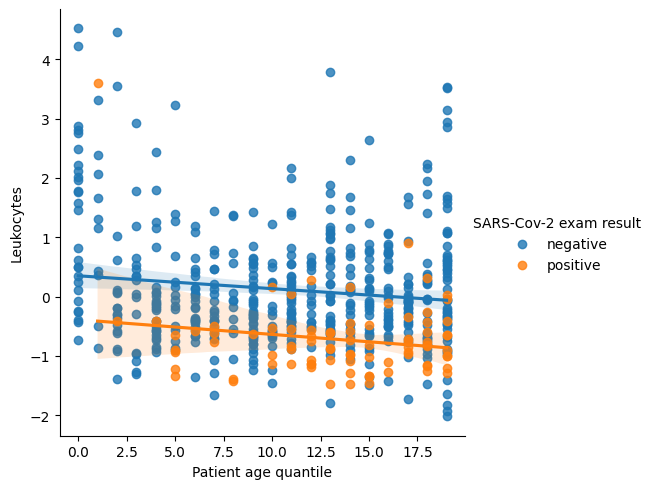

<Figure size 640x480 with 0 Axes>

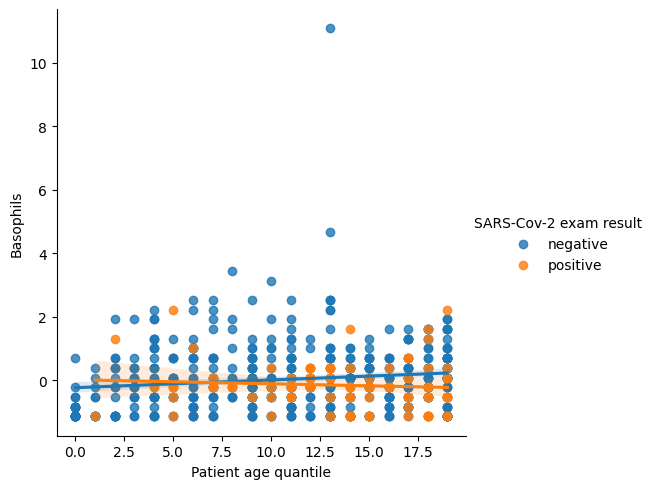

<Figure size 640x480 with 0 Axes>

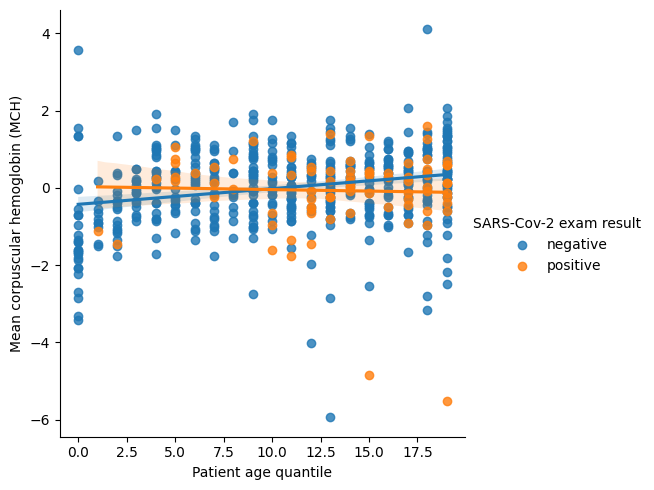

<Figure size 640x480 with 0 Axes>

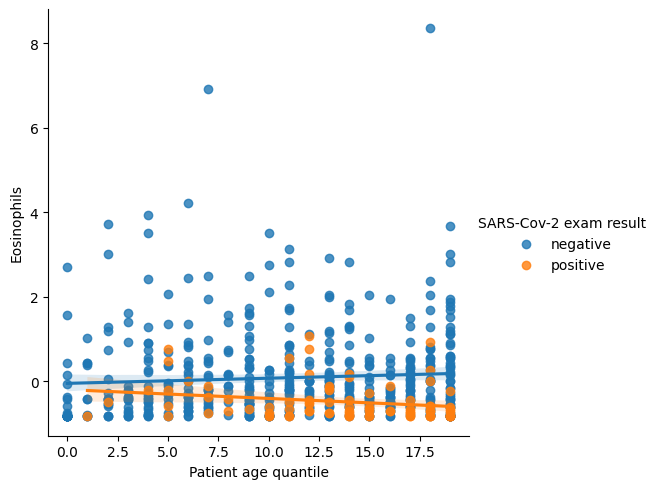

<Figure size 640x480 with 0 Axes>

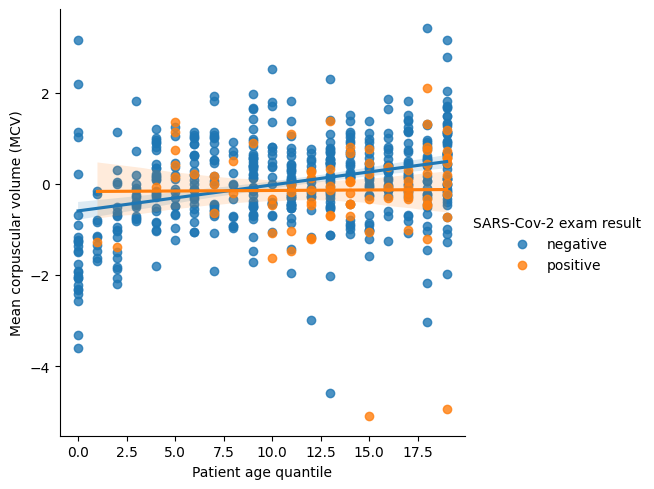

<Figure size 640x480 with 0 Axes>

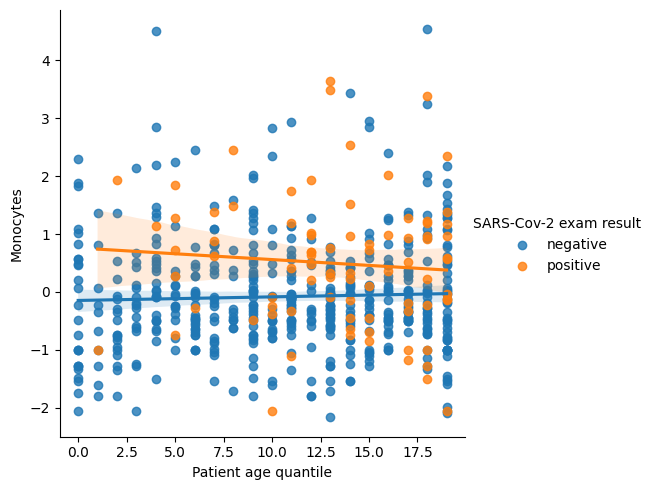

<Figure size 640x480 with 0 Axes>

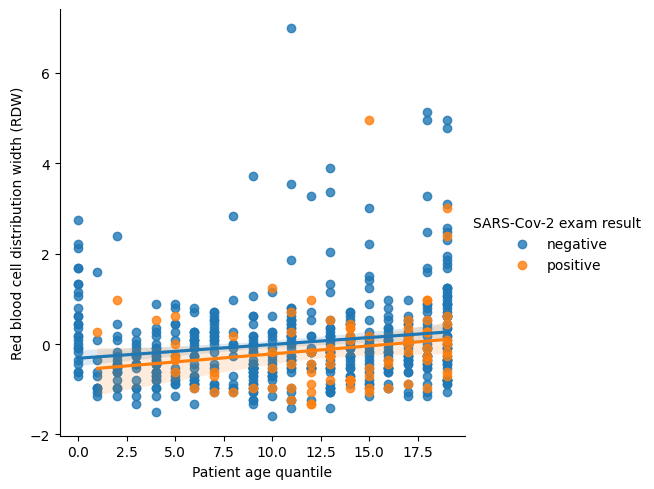

In [37]:
for col in blood_columns:
    plt.figure()
    sns.lmplot(x="Patient age quantile",y=col,hue='SARS-Cov-2 exam result',data=df)

**observation**: there is a weak relation between age and blood columns

### viral/viral

In [38]:
pd.crosstab(df["Influenza A"],df['Influenza A, rapid test'])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [39]:
pd.crosstab(df["Influenza B"],df['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

In [40]:
### maladie 
df["est malade"]=np.sum(df[viral_columns[:-2]]=="detected",axis=1)>=1

In [41]:
malase_df=df[df["est malade"]==True]
non_malase_df=df[df["est malade"]==False]

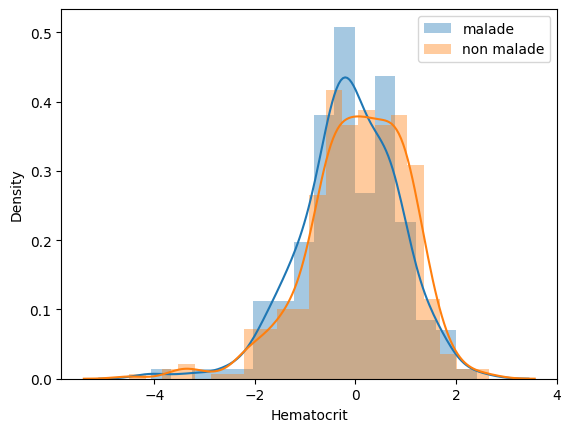

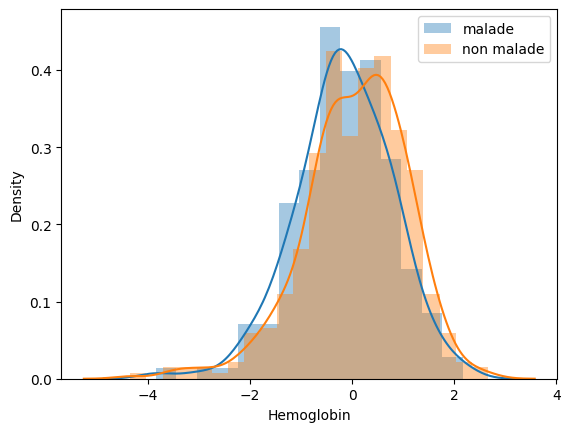

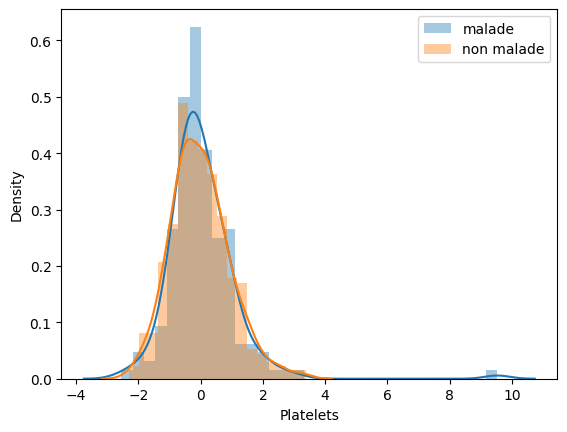

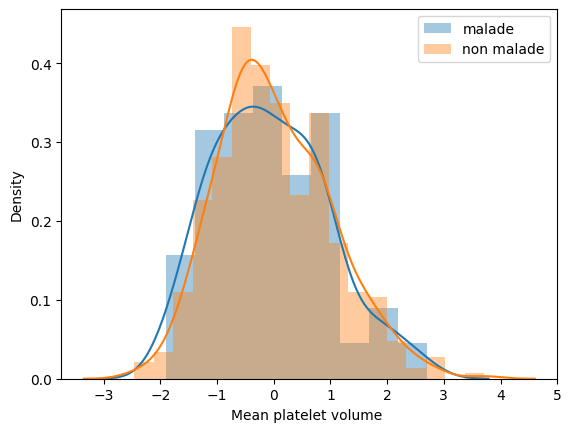

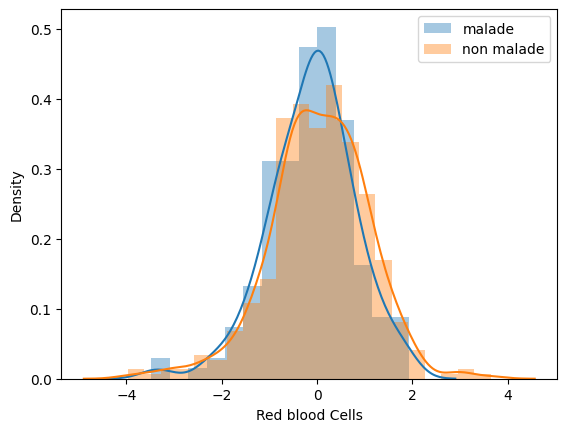

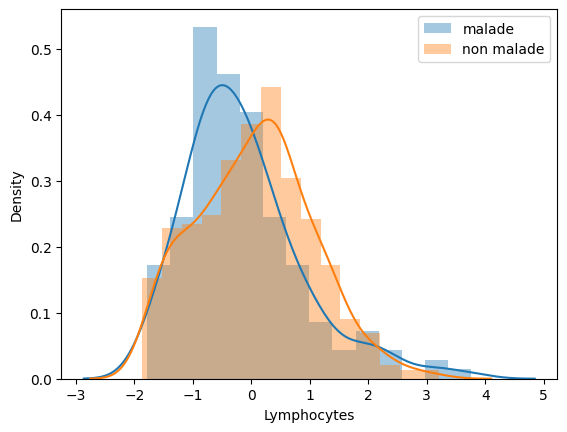

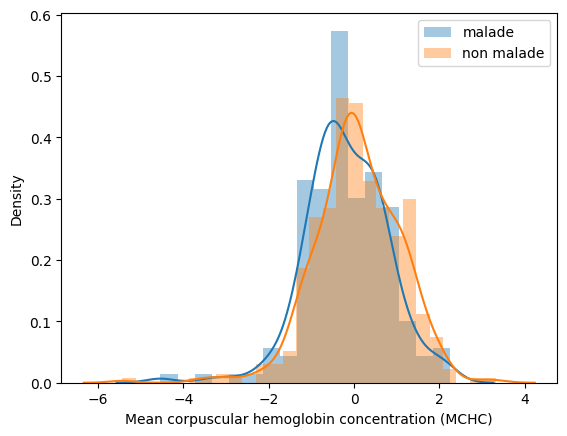

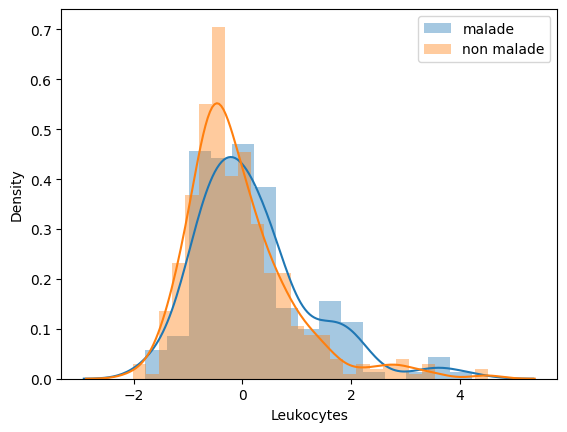

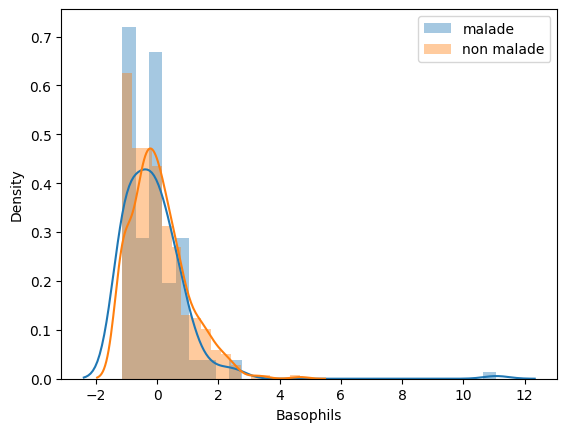

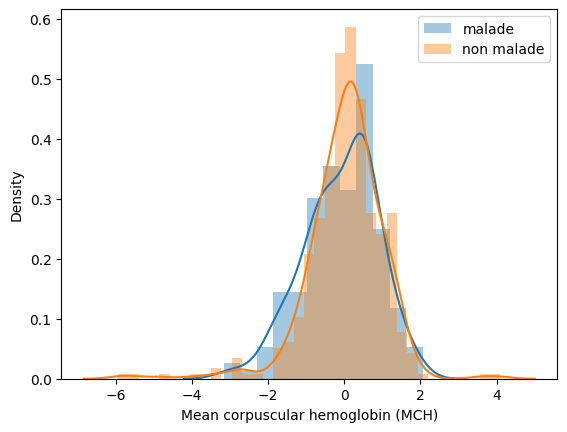

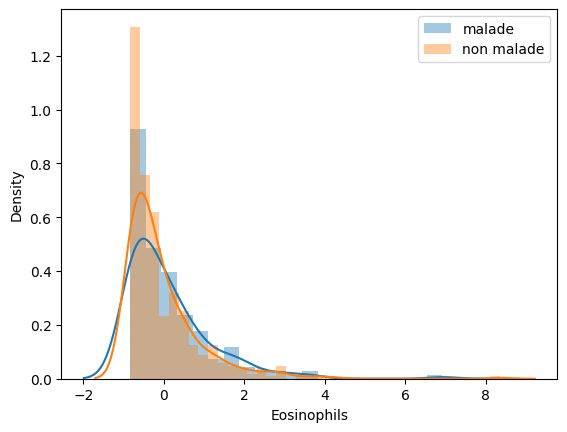

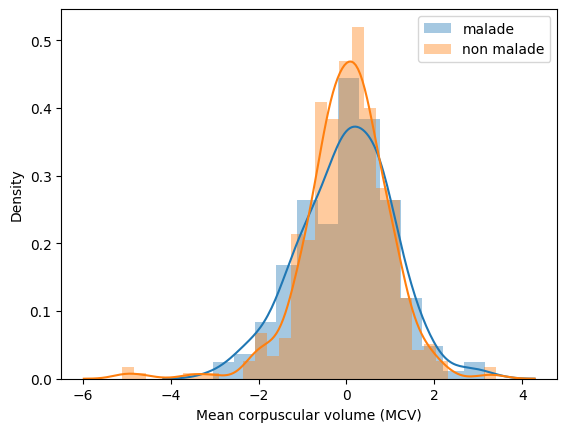

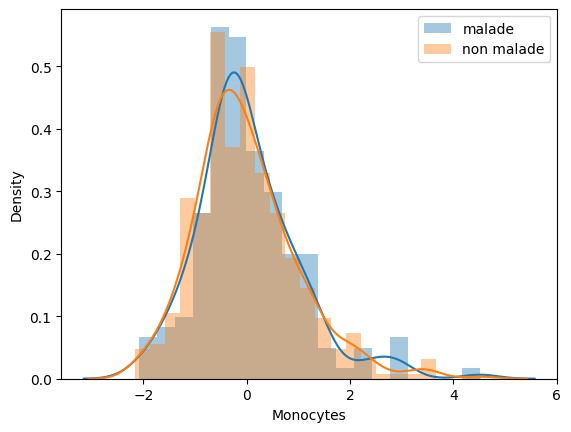

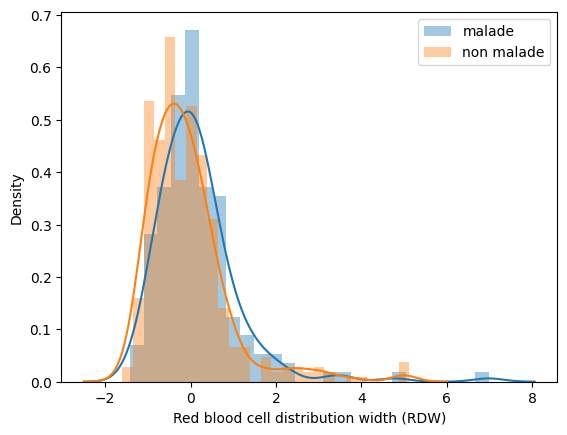

In [42]:
for col in blood_columns:
    plt.figure()
    sns.distplot(malase_df[col],label="malade")
    sns.distplot(non_malase_df[col],label="non malade")
    plt.legend()

In [43]:
df

Patient age quantile SARS-Cov-2 exam result  \
0                       13               negative   
1                       17               negative   
2                        8               negative   
3                        5               negative   
4                       15               negative   
...                    ...                    ...   
5639                     3               positive   
5640                    17               negative   
5641                     4               negative   
5642                    10               negative   
5643                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
0            NaN        NaN                    NaN              NaN   
1      -0.022340  -0.517413               0.010677         0.102004   
2            NaN        NaN                    NaN              NaN   
3            NaN        NaN                    NaN              NaN   
4            NaN        NaN                    NaN              NaN   
...          ...        ...                    ...              ...   
5639         NaN        NaN                    NaN              NaN   
5640         NaN        NaN                    NaN              NaN   
5641         NaN        NaN                    NaN              NaN   
5642         NaN        NaN                    NaN              NaN   
5643    0.541564  -0.906829              -0.325903         0.578024   

      Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  \
0             NaN                                               NaN   
1        0.318366                          

In [44]:
def hospitalisation(df):
    if df["Patient addmited to regular ward (1=yes, 0=no)"]==1:
        return "survaillance"
    elif df["Patient addmited to semi-intensive unit (1=yes, 0=no)"]==1:
        return "soins semi intensives"
    elif df["Patient addmited to intensive care unit (1=yes, 0=no)"]==1:
        return "soins intensives"
    else:
        return 'inconnu'

In [45]:
df["statut"]=df.apply(hospitalisation,axis=1)

In [46]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

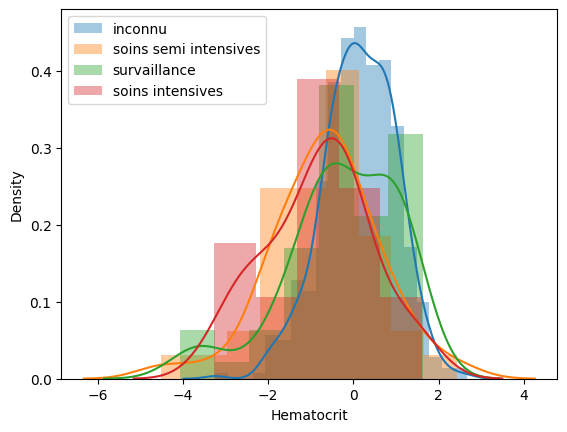

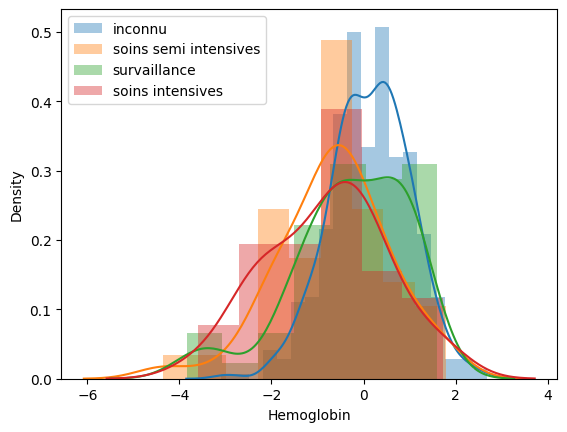

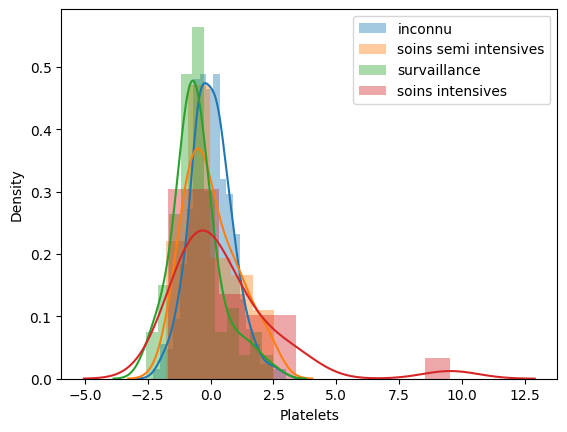

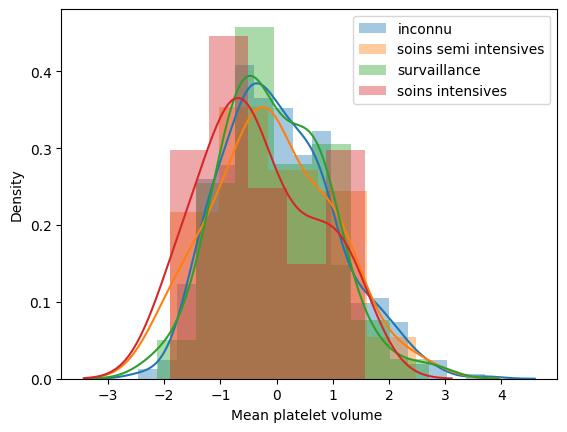

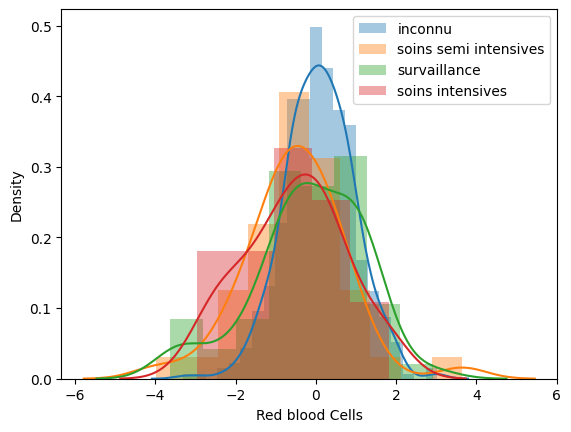

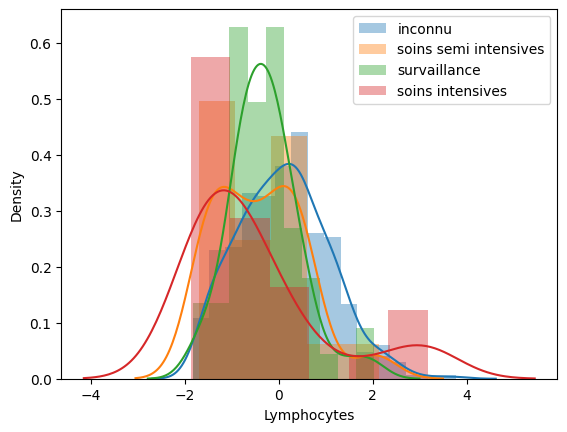

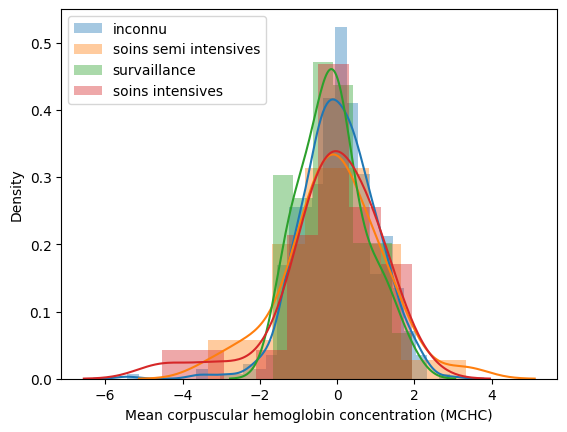

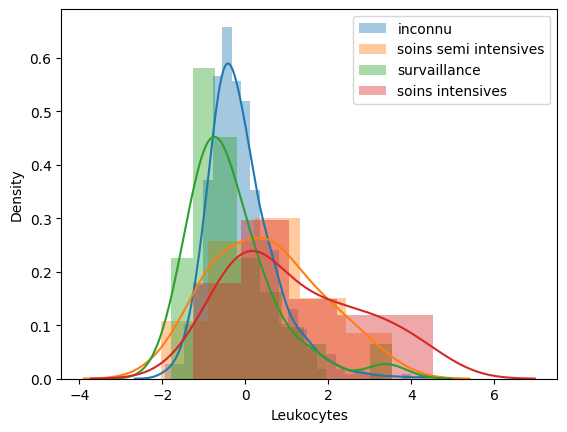

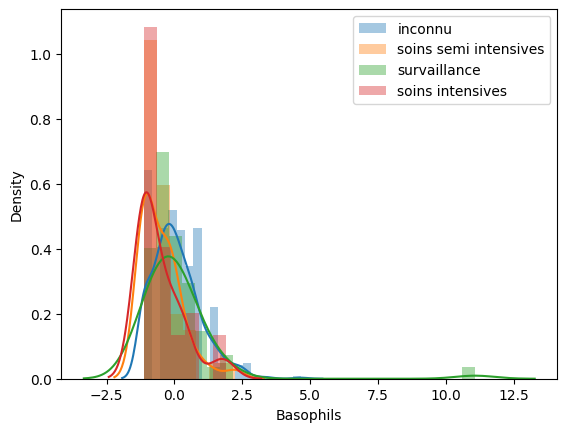

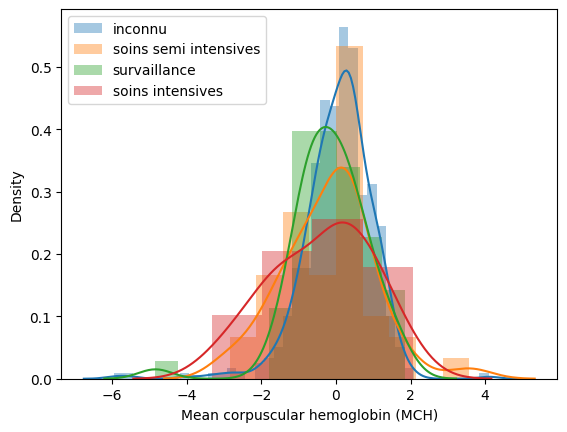

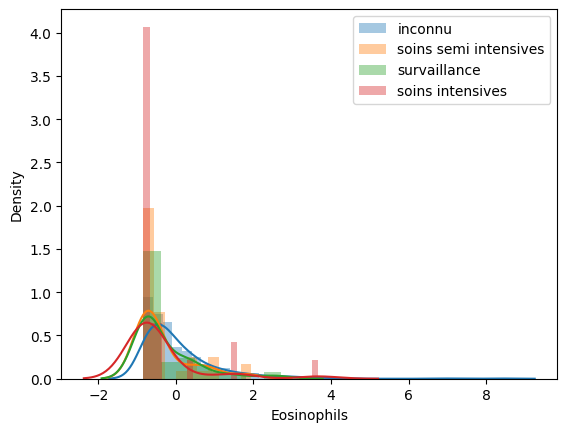

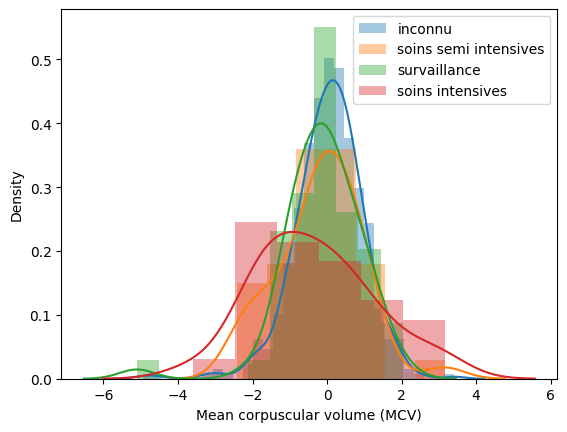

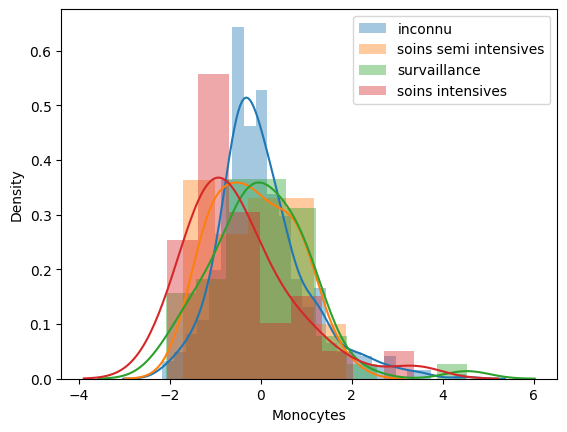

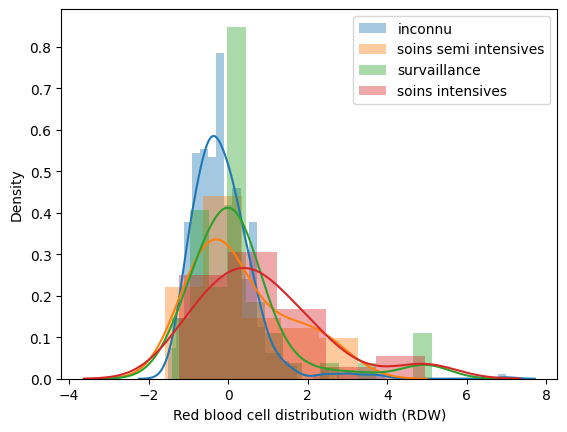

In [47]:
for col in blood_columns:
    plt.figure()
    for cat in df["statut"].unique():
        sns.distplot(df[df["statut"]==cat][col],label=cat)
    plt.legend()    

#### hypothese 
les individus atteints du covid-19 ont des taux de leukocytes,Monocytes,Platelets significativement differents
* H0= les taux moyens sont Egaux chez les individus positifs et negatifs


In [48]:
### Test-student
from scipy.stats import ttest_ind
balanced_ned=df_negative.sample(df_positive.shape[0])

In [49]:
def t_test(col):
    alpha=0.02
    stat,p=ttest_ind(balanced_ned[col].dropna(),df_positive[col].dropna())
    if p < alpha:
        return "H0 Rejetée"
    else:
        return 0

In [50]:
for col in blood_columns:
    print(f'{col :-<50} {t_test(col)}')

Hematocrit---------------------------------------- 0
Hemoglobin---------------------------------------- 0
Platelets----------------------------------------- H0 Rejetée
Mean platelet volume ----------------------------- H0 Rejetée
Red blood Cells----------------------------------- 0
Lymphocytes--------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)-- 0
Leukocytes---------------------------------------- H0 Rejetée
Basophils----------------------------------------- 0
Mean corpuscular hemoglobin (MCH)----------------- 0
Eosinophils--------------------------------------- H0 Rejetée
Mean corpuscular volume (MCV)--------------------- 0
Monocytes----------------------------------------- H0 Rejetée
Red blood cell distribution width (RDW)----------- 0


**observation**
* hypothese est vrai

In [51]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

In [ ]:
df.to_csv("data_eda.csv",index=False)